# Problema 2 - Dinámicas de Opinión y Polarización en Redes Sociales durante una Crisis Nacional

## *Autores*: 
- _Leonardo Ponce 202030531-5 (leonardo.ponde@usm.cl)_
- _Álvaro Pozo 202030535-8 (alvaro.pozo@usm.cl)_


## Contexto

En el marco de las elecciones presidenciales, las redes sociales han adquirido un rol
central como espacio de difusión de información, debate y propaganda política. Sin
embargo, también se han convertido en terreno fértil para la circulación de noticias
falsas (fake news), campañas de desinformación coordinada y el uso de cuentas
automatizadas (bots) que distorsionan la conversación pública.
Este problema busca que analicen cómo se propaga este tipo de información, qué
actores y comunidades la potencian, y cómo es posible identificar patrones ocultos
mediante el uso de redes, análisis temporal y procesamiento de texto.

## Objetivos

### Objetivo general
Analizar cómo se forman y evolucionan las opiniones y la polarización en redes sociales durante una crisis nacional.

### Objetivos especificos

- Recolectar y analizar publicaciones relacionadas con una crisis nacional.

- Construir una red social de interacciones y detectar comunidades.

- Modelar la propagación de opiniones mediante distintos enfoques.

- Simular escenarios de polarización o consenso.

- Visualizar e interpretar los resultados obtenidos.

# Desarrollo del problema

## Parte 1

En el siguiente código se definen las rutas para guardar los resultados en la carpeta results

In [ ]:
from pathlib import Path
import os

# Definición de Rutas

# 1. Obtenemos el Directorio de Trabajo Actual
current_working_dir = Path.cwd()
print(f"Tu directorio de trabajo actual (cwd) es: {current_working_dir}")

# 2. Verificamos si estamos dentro de la carpeta 'src'
if current_working_dir.name == 'src':
    # Si el nombre del directorio es 'src', subimos un nivel
    PROJECT_ROOT = current_working_dir.parent
    print("Detecté que estás en 'src'. Subiendo un nivel a la raíz del proyecto.")
else:
    # Si no, asumimos que el cwd YA es la raíz del proyecto
    PROJECT_ROOT = current_working_dir
    print("Asumiendo que el directorio actual (cwd) es la raíz del proyecto.")

# 3. Definimos la carpeta de resultados basada en la raíz
RESULTS_DIR = PROJECT_ROOT / 'results'

# 4. Creamos la carpeta de resultados en la RAÍZ (si no existe)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print(f"¡Éxito! Los resultados se guardarán en: {RESULTS_DIR}")

Tu directorio de trabajo actual (cwd) es: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\src
Detecté que estás en 'src'. Subiendo un nivel a la raíz del proyecto.
¡Éxito! Los resultados se guardarán en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results


### Lectura del dataset

Algunos imports importantes para trabajar en el código

In [1]:
import pandas as pd
import numpy as np
import re
import emoji
from tqdm import tqdm
tqdm.pandas()

Lectura del dataset

In [2]:
import pandas as pd
import numpy as np
data1 = pd.read_excel('../data/datos_incendio.xlsx')

verificando si es que existen tweets duplicados para así eliminarlos

In [3]:
# verificar si hay filas duplicadas para eliminarlas
print(data1.duplicated().sum())

0


ver todas las columnas que contiene el dataset y la cantidad de filas

In [4]:
print("Filas:", data1.shape)
print("Columnas:")
print(data1.columns.tolist())
print(data1.iloc[0])

Filas: (1815, 24)
Columnas:
['Query_Str', 'Post_URL', 'Author_Name', 'Author_Web_Page_URL', 'Author_Handle', 'Verified_Status', 'UTC_Time', 'Ads', 'Tweet_Content', 'Post_ID', 'Tweet_URL', 'Reply_Count', 'Repost_Count', 'Like_Count', 'View_Count', 'Bookmark_Count', 'Tweet_Image_URL', 'Replying_to', 'Reply_to_Whom', 'Reply_to_Whom_URL', 'Reply_to_Whom_Username', 'Reply_to_Whom_Handle', 'Language', 'Type']
Query_Str                 "Valparaíso" (CONAF OR damnificados OR fuego O...
Post_URL                  https://x.com/search?q="Valparaíso" (CONAF OR ...
Author_Name                                                 adriana latorre
Author_Web_Page_URL                                   https://x.com/latower
Author_Handle                                                       latower
Verified_Status                                                       False
UTC_Time                                          2024-02-02 19:45:18+00:00
Ads                                                          

### Preprocesado de textos y limpieza

Este código limpia los textos de los tweets para dejarlos listos antes de analizarlos. Lo que hace es: convertir todo a minúsculas, reemplazar los enlaces y menciones por etiquetas, quitar el símbolo de los hashtags y eliminar espacios de más. Luego crea una nueva columna con los tweets ya limpios y muestra un ejemplo comparando el texto original con el texto procesado.

In [ ]:
import re


def preprocess_for_sentiment(text):
    # Asegurarnos de que el texto sea un string
    if not isinstance(text, str):
        text = str(text)
    
    # 1. Convertir a minúsculas
    text = text.lower()
    
    # 2. Eliminar URLs
    text = re.sub(r'http\S+|www\S+', '[URL]', text) # Reemplazamos por un token
    
    # 3. Eliminar menciones (@usuario)
    text = re.sub(r'@\w+', '[USER]', text) # Reemplazamos por un token
    
    # 4. Eliminar hashtags (#tema) -> Dejamos la palabra
    text = re.sub(r'#', '', text)
    
    # 5. Opcional: Eliminar números (si no son relevantes)
    # text = re.sub(r'\d+', '', text) 
    
    
    # 6. Quitar espacios extra que hayan quedado
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

#  Aplicar la limpieza a la columna 'Tweet_Content'
print("Iniciando preprocesamiento (versión mejorada)...")
# Creamos una nueva columna 'Clean_Tweet'
data1['Clean_Tweet'] = data1['Tweet_Content'].apply(preprocess_for_sentiment)

print("¡Preprocesamiento terminado!")

# Ver los resultados de la limpieza
print("\nEjemplo de limpieza (versión mejorada):")
print("Original:", data1['Tweet_Content'].iloc[0])
print("Limpio:", data1['Clean_Tweet'].iloc[0])

Iniciando preprocesamiento (versión mejorada)...
¡Preprocesamiento terminado!

Ejemplo de limpieza (versión mejorada):
Original: Esto no es casualidad #incendio #VALPARAÍSO #ruta68
Limpio: esto no es casualidad incendio valparaíso ruta68


### Análisis de sentimientos 

Este código carga un modelo para analizar sentimientos en español y lo usa para revisar cada tweet de los que fueron limpiados. Primero convierte los textos en una lista, luego el modelo evalúa cada uno y determina si el sentimiento es positivo, negativo o neutral. Después, se guardan esos resultados en una nueva columna del DataFrame y se muestran algunos ejemplos junto con un conteo de cuántos tweets pertenecen a cada categoría.

In [ ]:
from pysentimiento import create_analyzer

# Cargar el analizador de sentimientos en español 
# Esto puede tardar un momento la primera vez, ya que descarga el modelo.
print("\nCargando modelo de análisis de sentimientos...")
analyzer = create_analyzer(task='sentiment', lang='es')
print("¡Modelo cargado!")

# Predecir los sentimientos de todos los tuits limpios
# Convertimos la columna a una lista para dársela al analizador
tweets_limpios = data1['Clean_Tweet'].tolist()

print("Analizando sentimientos (esto puede tardar un poco si hay muchos datos)...")
# El analizador procesa la lista completa
resultados = analyzer.predict(tweets_limpios)

# Extraer los resultados y agregarlos al DataFrame
# 'pysentimiento' devuelve 'POS', 'NEG' o 'NEU'
sentimientos = [r.output for r in resultados]

# Creamos la nueva columna 'Sentiment' en nuestro DataFrame
data1['Sentiment'] = sentimientos

print("¡Análisis de sentimientos completado!")

# Revisar los resultados
print("\nResultados del análisis:")
print(data1[['Tweet_Content', 'Clean_Tweet', 'Sentiment']].head())

# Ver cuántos tuits hay de cada categoría
print("\nConteo de sentimientos:")
print(data1['Sentiment'].value_counts())


Cargando modelo de análisis de sentimientos...
¡Modelo cargado!
Analizando sentimientos (esto puede tardar un poco si hay muchos datos)...


Map:   0%|          | 0/1815 [00:00<?, ? examples/s]

¡Análisis de sentimientos completado!

Resultados del análisis:
                                       Tweet_Content  \
0  Esto no es casualidad #incendio #VALPARAÍSO #r...   
1  #VALPARAÍSO #IF #RUTA68 #ALERTAROJA AHORA| Sen...   
2  #VALPARAÍSO #LAGUNAVERDE #IF AHORA| Bomberos V...   
3  NOTEN!! Cuando el Gobierno se ve atrapado, sor...   
4  #VALPARAÍSO #RUTA68 #ALERTAROJA AHORA| Violent...   

                                         Clean_Tweet Sentiment  
0   esto no es casualidad incendio valparaíso ruta68       NEU  
1  valparaíso if ruta68 alertaroja ahora| senapre...       NEU  
2  valparaíso lagunaverde if ahora| bomberos valp...       NEU  
3  noten!! cuando el gobierno se ve atrapado, sor...       NEG  
4  valparaíso ruta68 alertaroja ahora| violento i...       NEG  

Conteo de sentimientos:
Sentiment
NEU    1117
NEG     640
POS      58
Name: count, dtype: int64


###  grafo de usuarios o publicaciones

Este código construye un mapa de interacciones entre usuarios usando un grafo dirigido. Primero limpia y estandariza los nombres de usuario, y luego revisa cada tweet para detectar dos tipos de interacción: respuestas y menciones. Cada vez que un usuario responde o menciona a otro, se agrega una flecha en el grafo que muestra esa conexión. Al final, se obtiene una red que permite visualizar quién interactúa con quién y cuántas relaciones existen dentro del conjunto de datos.

In [ ]:
import networkx as nx
import pandas as pd
import re
import matplotlib.pyplot as plt

# Preparar los datos
# Nos aseguramos de que no hay 'handles' nulos que puedan ser 'fuente'
data1.dropna(subset=['Author_Handle'], inplace=True)

# Convertir todos los handles a string y minúsculas para unificarlos
data1['Author_Handle'] = data1['Author_Handle'].astype(str).str.lower()
data1['Reply_to_Whom_Handle'] = data1['Reply_to_Whom_Handle'].astype(str).str.lower()


# Inicializar el Grafo Dirigido
G = nx.DiGraph()

print("Construyendo el grafo de interacciones...")

# Poblar el Grafo (iterar sobre las filas)
# Usamos itertuples() por ser más rápido que iterrows()
for row in data1.itertuples():
    
    source = row.Author_Handle
    

    # Interacción 1: RESPUESTAS
    target_reply = row.Reply_to_Whom_Handle
    
    # Verificamos que no sea un valor nulo ('nan' como string o None)
    if pd.notna(target_reply) and target_reply not in ['nan', 'none']:
        
        # Añadimos la arista (flecha)
        # G.add_edge(source, target, ...)
        G.add_edge(source, 
                   target_reply, 
                   interaction_type='reply', 
                   post_id=row.Post_ID)
    
    # Interacción 2: MENCIONES
    content = row.Tweet_Content
    
    if isinstance(content, str):
        # Expresión regular para encontrar @menciones
        # (Busca un @ seguido de uno o más caracteres de palabra)
        mentions = re.findall(r'@(\w+)', content)
        
        for target_mention in mentions:
            target_mention = target_mention.lower() # Normalizar
            
            # Evitar auto-menciones (o interacciones nulas)
            if target_mention != source:
                
                # Añadimos la arista (flecha)
                G.add_edge(source, 
                           target_mention, 
                           interaction_type='mention',
                           post_id=row.Post_ID)

print("¡Grafo construido!")
print("---" * 10)
print(f"Total de Nodos (usuarios): {G.number_of_nodes()}")
print(f"Total de Aristas (interacciones): {G.number_of_edges()}")

Construyendo el grafo de interacciones...
¡Grafo construido!
------------------------------
Total de Nodos (usuarios): 597
Total de Aristas (interacciones): 704


### Primer Análisis: ¿Quiénes son los usuarios clave?

Descripción del código

Este código analiza la red de interacciones entre usuarios para identificar quiénes son los más importantes dentro de la conversación. Lo que hace es:

- Contar cuántas veces cada usuario interactúa con otros (menciones o respuestas).

- Contar cuántas veces cada usuario recibe interacciones de otros.

- Organizar esa información en una tabla y calcular un total de actividad por usuario.

- Finalmente, mostrar dos rankings:

- - Los usuarios más influyentes, es decir, los que reciben más menciones o respuestas.

- - Los usuarios más activos, quienes más veces mencionan o responden a otros.

Con esto se puede ver de manera más sencilla quiénes líderan dentro de la red, ya sea por su nivel de participación o por la cantidad de atención que reciben.

In [ ]:
# Análisis Básico: Centralidad

# Contar cuántas interacciones 'salen' de cada usuario (cuán activos son)
out_degrees = G.out_degree()
# Contar cuántas interacciones 'llegan' a cada usuario (cuán influyentes son)
in_degrees = G.in_degree()

# Convertir a un DataFrame de pandas para verlo mejor
df_centrality = pd.DataFrame({
    'out_degree': dict(out_degrees), # Grado de salida (cuántas veces mencionó/respondió)
    'in_degree': dict(in_degrees)    # Grado de entrada (cuántas veces FUE mencionado/respondido)
})

# Sumar ambos para un 'total' de interacciones
df_centrality['total_degree'] = df_centrality['out_degree'] + df_centrality['in_degree']

# --- Ver los 10 usuarios MÁS INFLUYENTES (más mencionados/respondidos) ---
print("\n--- Top 10 Usuarios Más Influyentes (más interacciones entrantes) ---")
print(df_centrality.sort_values(by='in_degree', ascending=False).head(10))

# --- Ver los 10 usuarios MÁS ACTIVOS (más menciones/respuestas) ---
print("\n--- Top 10 Usuarios Más Activos (más interacciones salientes) ---")
print(df_centrality.sort_values(by='out_degree', ascending=False).head(10))


--- Top 10 Usuarios Más Influyentes (más interacciones entrantes) ---
                 out_degree  in_degree  total_degree
senapred                  5         30            35
gabrielboric              0         20            20
conaf_minagri             0         17            17
biobio                    0         14            14
gobiernodechile           0         10            10
cbv1851                   6         10            16
24horastvn                0          9             9
carabdechile              1          9            10
incendios_conaf           5          9            14
s                         0          7             7

--- Top 10 Usuarios Más Activos (más interacciones salientes) ---
                 out_degree  in_degree  total_degree
yoyiromero               21          2            23
elirgeo                  19          0            19
conaf_valpa              18          4            22
alegriagonzaa            18          2            20
cevalparaiso  

Usuarios clave según la red de interacciones

A partir del análisis de centralidad, se pueden identificar dos tipos de usuarios relevantes:

1. Usuarios más influyentes (los que reciben más interacciones)

Estos son los usuarios que más veces fueron mencionados o respondidos, lo que indica alta visibilidad y relevancia dentro de la conversación:

- @senapred: Es el usuario más influyente, con una cantidad muy alta de interacciones entrantes. Esto muestra que es una cuenta central en la discusión.

- @gabrielboric: También muy mencionado, lo que refleja su rol público y peso en el tema tratado.

- @conaf_minagri, @biobio, @gobiernodechile: Figuran como cuentas institucionales con alta llegada de interacciones.

- Otros actores relevantes dentro del top 10 incluyen a @cbv1851, @24horastvn, @carabdechile e @incendios_conaf, todos con un rol destacado en la conversación por el alto número de menciones.

2. Usuarios más activos (generan más interacciones)

Estos usuarios son quienes realizaron más respuestas o menciones, mostrando una participación intensa:

- @yoyiromero y @elirgeo: Lideran la lista como los usuarios más activos, con un volumen significativo de mensajes dirigidos a otros.

- @conaf_valpa, @alegriagonzaa, @cevalparaiso: También destacan por su alto nivel de participación dentro del intercambio.

- Otros participantes como @pabl0manzanares, @micheldelherbe, @subseinterior, @siss_chile y @ucvradio muestran un comportamiento igualmente activo.

###  métricas de red y detección de comunidades

Este código combina la información de los sentimientos con la red de interacciones entre usuarios para analizar mejor el comportamiento de la conversación. Primero, traduce los sentimientos de cada tweet (positivo, neutro o negativo) a números y calcula el sentimiento promedio de cada usuario según lo que publica. Luego, detecta comunidades de usuarios (grupos que interactúan más entre ellos) y mide qué tan bien separadas están esas comunidades. Además, calcula métricas de red como PageRank (qué tan influyente es un usuario) y betweenness (qué tan "puente" es entre otros). Finalmente, guarda toda esta información en un DataFrame para poder revisar y analizar los resultados por usuario.

In [ ]:
import pandas as pd
import networkx as nx
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt

# 1. Agregar Sentimiento Promedio a cada Nodo (Usuario)

print("Asignando sentimiento promedio a los usuarios...")

# Mapear sentimientos a valores numéricos
sentiment_map = {
    'POS': 1,
    'NEU': 0,
    'NEG': -1
}
# Asegurarnos de que no haya NaN en la columna de sentimiento
data1['Sentiment'] = data1['Sentiment'].fillna('NEU') 
data1['sentiment_score'] = data1['Sentiment'].map(sentiment_map)

# Calcular el sentimiento promedio de cada AUTOR
# (solo de los tuits que ellos escribieron)
user_sentiment = data1.groupby('Author_Handle')['sentiment_score'].mean()

# Convertir esto a un diccionario para asignarlo a los nodos del grafo
sentiment_dict = user_sentiment.to_dict()

# Asignar el sentimiento promedio como un atributo a cada nodo en el grafo
nx.set_node_attributes(G, sentiment_dict, 'avg_sentiment')

# 2. Detección de Comunidades (Algoritmo Louvain)

print("Detectando comunidades...")

# Convertimos G a no dirigido para 'encontrar' comunidades
# (quién interactúa con quién, sin importar la dirección)
G_undirected = G.to_undirected()

# Encontrar la mejor partición (comunidades)
partition = community_louvain.best_partition(G_undirected)

# Cuántas comunidades encontramos?
num_communities = len(set(partition.values()))
print(f"Se encontraron {num_communities} comunidades.")

# Calcular la modularidad (mide qué tan "buenas" son las divisiones)
# Un valor > 0.3 es bueno, > 0.5 es muy bueno (silos claros)
modularity = community_louvain.modularity(partition, G_undirected)
print(f"Modularidad de la red: {modularity:.4f}")

# Guardar la comunidad de cada nodo como un atributo en nuestro grafo ORIGINAL
nx.set_node_attributes(G, partition, 'community_id')

# --- 3. Cálculo de Métricas de Red ---

print("Calculando métricas de red (PageRank y Betweenness)...")

# PageRank: Mide la "influencia" de un nodo.
# Es como el In-Degree, pero da más peso a las menciones de otros nodos influyentes.
pagerank = nx.pagerank(G, alpha=0.85)

# Betweenness Centrality: Mide cuántas veces un nodo actúa como "puente"
# en el camino más corto entre otros dos nodos.
# ¡ADVERTENCIA! Esto puede ser MUY lento en grafos grandes.
# Si tarda demasiado, puedes usar una muestra:
# betweenness_centrality = nx.betweenness_centrality(G, k=int(G.number_of_nodes() * 0.1))
betweenness_centrality = nx.betweenness_centrality(G)

# Guardar estas métricas como atributos de los nodos
nx.set_node_attributes(G, pagerank, 'pagerank')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness')

# --- 4. Consolidar Todo en un DataFrame para Análisis ---

print("Creando DataFrame de análisis de nodos...")

# Extraer todos los atributos de los nodos en un diccionario
node_data_dict = dict(G.nodes(data=True))

# Convertirlo a un DataFrame de Pandas
node_data = pd.DataFrame.from_dict(node_data_dict, orient='index')

# Llenar NaN para nodos que no tenían sentimiento promedio (ej. solo fueron mencionados)
node_data['avg_sentiment'] = node_data['avg_sentiment'].fillna(0) # Asumir neutralidad

print("\n--- Análisis de Nodos (Primeras 10 filas) ---")
print(node_data.head(10))

print("\n¡Análisis de métricas y comunidades completado!")

Asignando sentimiento promedio a los usuarios...
Detectando comunidades...
Se encontraron 79 comunidades.
Modularidad de la red: 0.7900
Calculando métricas de red (PageRank y Betweenness)...
Creando DataFrame de análisis de nodos...

--- Análisis de Nodos (Primeras 10 filas) ---
                 avg_sentiment  community_id  pagerank  betweenness
incendios_conaf      -0.116279             0  0.003939     0.002081
pabl0manzanares      -0.222222             0  0.001651     0.000538
biobio                0.000000             0  0.005551     0.000000
bomberosdechile      -0.083333             0  0.002267     0.000186
ttivalparaiso         0.000000             0  0.007728     0.000000
alegriagonzaa         0.000000            58  0.001498     0.000254
fdo2000              -1.000000             0  0.001068     0.000000
conaf_valpa           0.033333            45  0.002136     0.003114
carabdechile          0.000000            62  0.024213     0.000000
dprvalparaiso         0.000000          

### Visualización del grafo y distribución de sentimientos (por comunidad)

Este código crea un gráfico que muestra cómo varía el sentimiento promedio dentro de las comunidades más grandes de la red. Primero selecciona las 10 comunidades con más usuarios y toma sus datos. Luego genera un boxplot donde se observa la distribución de sentimientos de cada una, permitiendo comparar si ciertas comunidades tienden a ser más positivas, negativas o neutrales. Finalmente, guarda la imagen del gráfico en la carpeta de resultados y la muestra en pantalla.

Generando visualización de sentimientos por comunidad...
Gráfico guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\sentimientos_por_comunidad.png


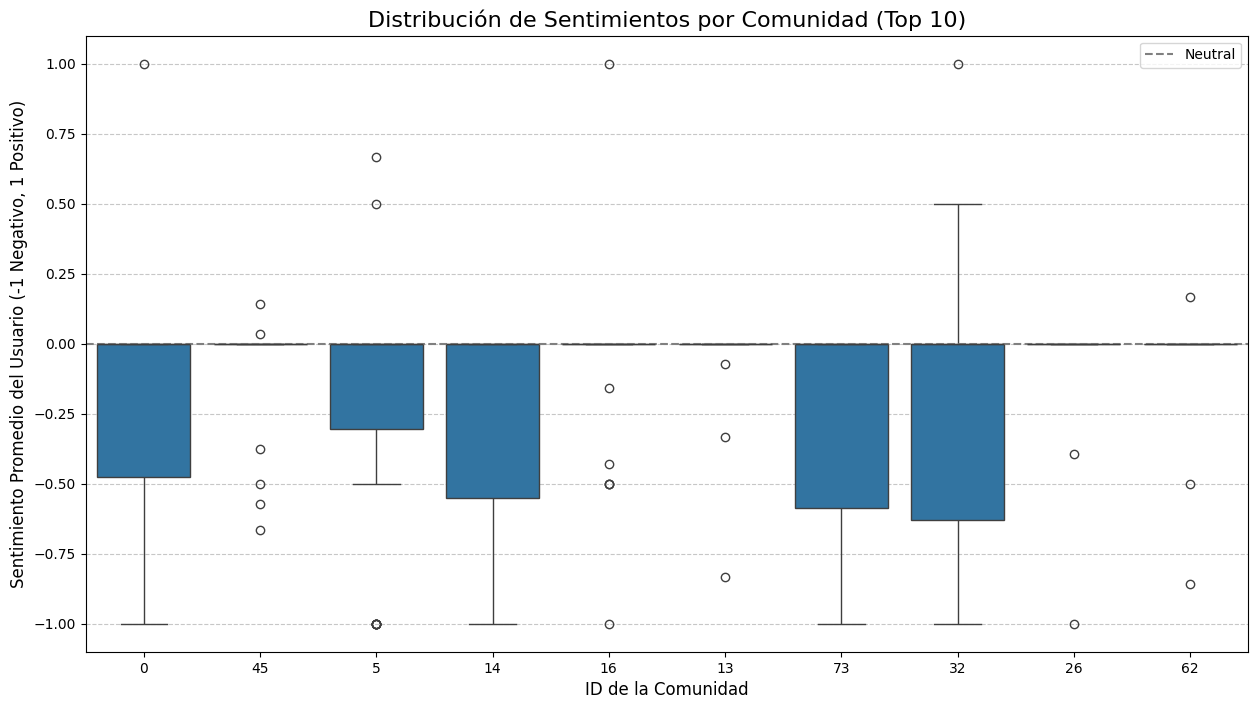

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 


print("Generando visualización de sentimientos por comunidad...")

# código de preparación de 'plot_data'
community_sizes = node_data['community_id'].value_counts()
top_n_communities = community_sizes.head(10).index
plot_data = node_data[node_data['community_id'].isin(top_n_communities)]

# 2. Crear el Gráfico
plt.figure(figsize=(15, 8))
sns.boxplot(x='community_id', y='avg_sentiment', data=plot_data, order=top_n_communities)

# 3. Mejorar la legibilidad
# código de títulos y etiquetas
plt.title('Distribución de Sentimientos por Comunidad (Top 10)', fontsize=16)
plt.xlabel('ID de la Comunidad', fontsize=12)
plt.ylabel('Sentimiento Promedio del Usuario (-1 Negativo, 1 Positivo)', fontsize=12)
plt.axhline(0, color='grey', linestyle='--', label='Neutral')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 4. Guardar el gráfico en la carpeta 'results/' correcta
output_filename = RESULTS_DIR / 'sentimientos_por_comunidad.png'
plt.savefig(output_filename)
print(f"Gráfico guardado en: {output_filename}")

plt.show()

Este código genera una visualización completa de la red de usuarios. Cada punto del grafo representa a un usuario, donde el color indica a qué comunidad pertenece y el tamaño muestra su nivel de influencia según PageRank. Primero se prepara la información necesaria (colores y tamaños), luego se calcula la posición de cada nodo en el espacio usando un algoritmo que separa naturalmente a los grupos. Finalmente, se dibuja el grafo, se le agrega un título y se guarda la imagen en la carpeta de resultados.

Generando visualización del grafo de red... (Esto puede tardar)
Layout calculado. Dibujando nodos...
Gráfico guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\grafo_comunidades.png


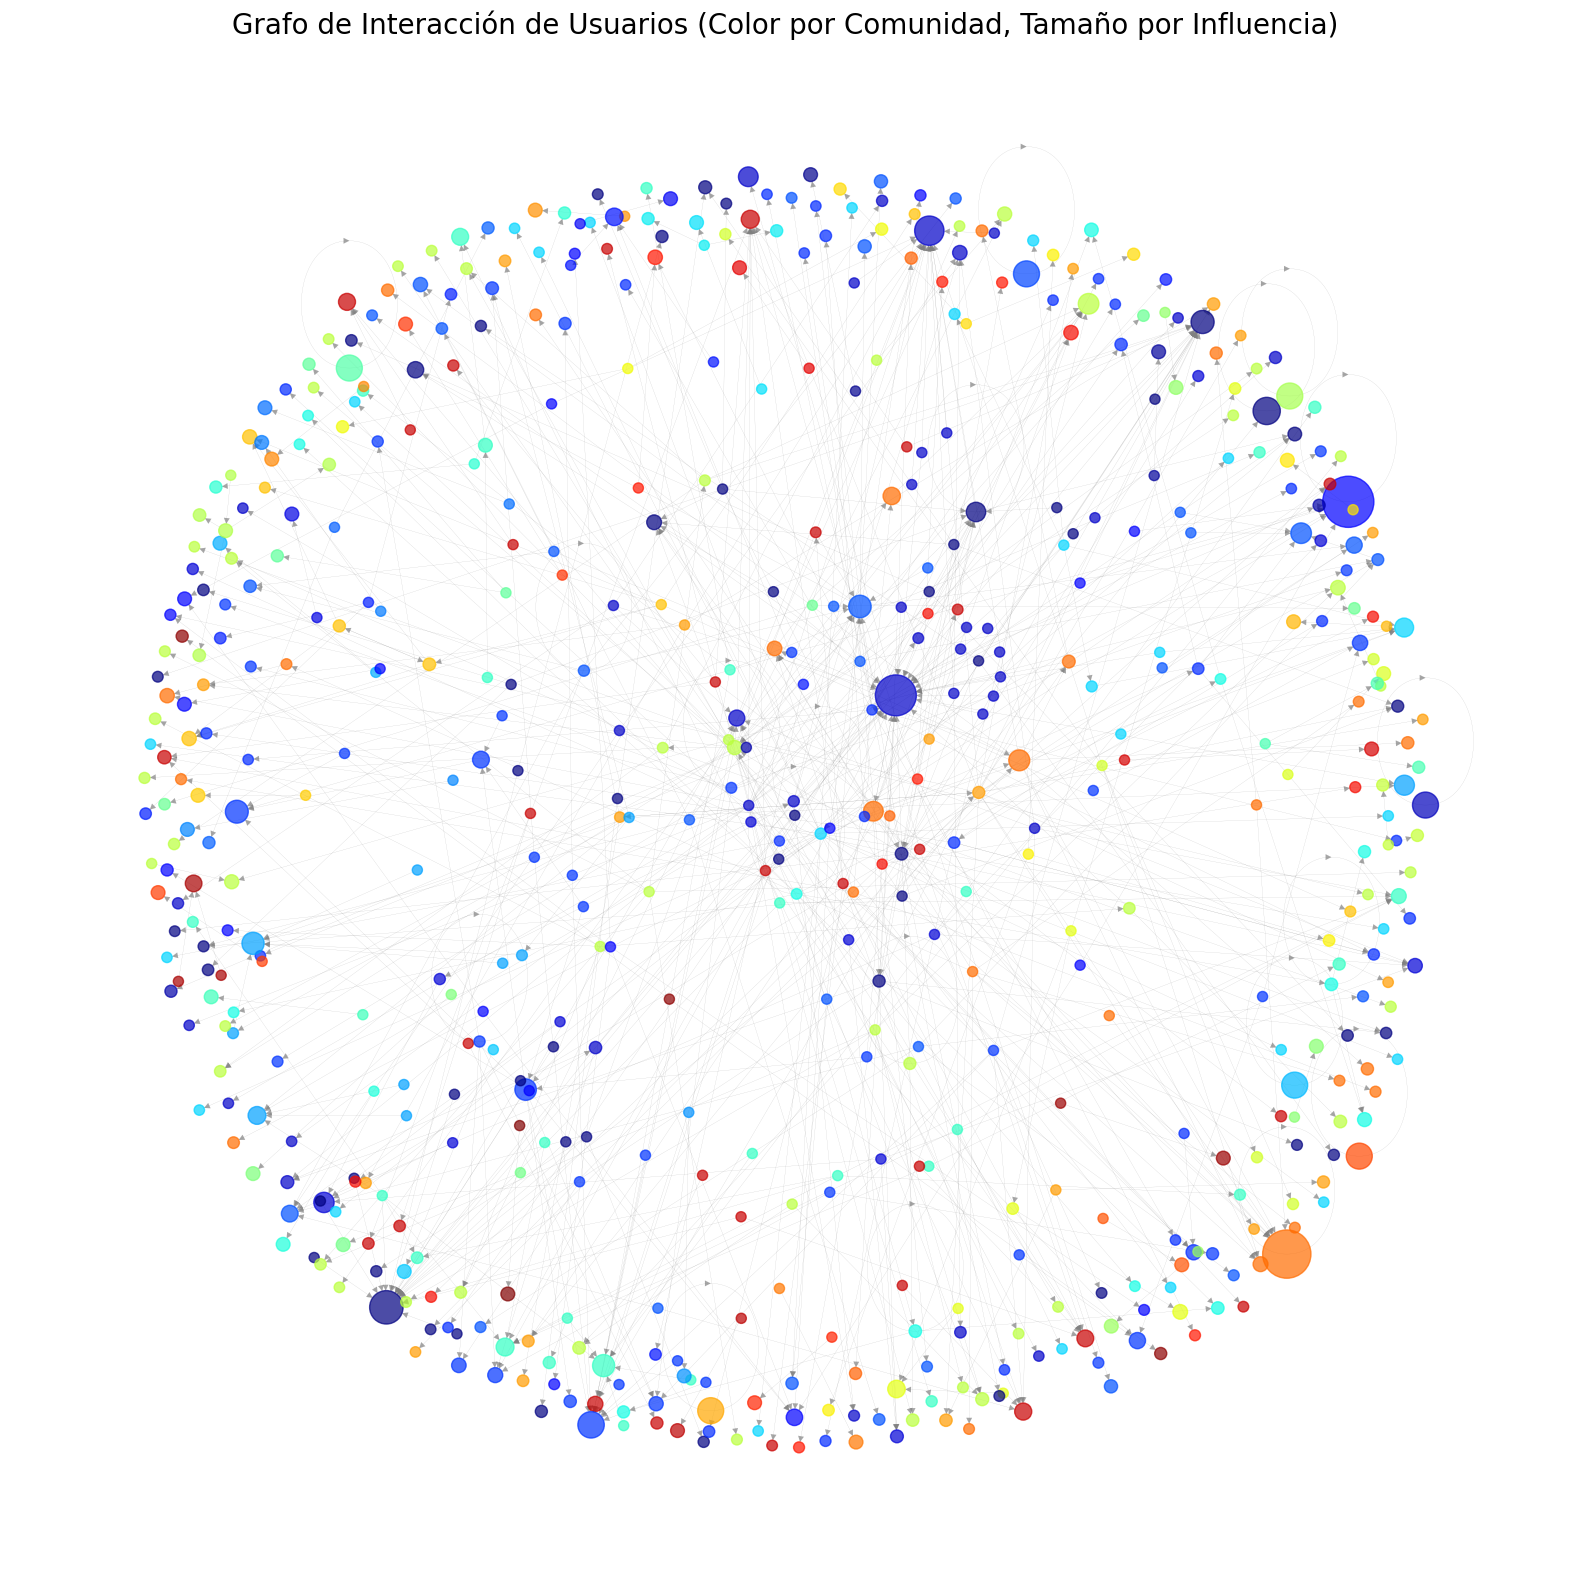

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path


print("Generando visualización del grafo de red... (Esto puede tardar)")

# código de preparación de 'node_colors' y 'node_sizes'
nodes_in_order = list(G.nodes())
node_colors = [node_data.loc[node]['community_id'] for node in nodes_in_order]
node_sizes = [node_data.loc[node]['pagerank'] * 50000 for node in nodes_in_order]

# Dibujar el Grafo
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.15, iterations=50)

print("Layout calculado. Dibujando nodos...")
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_colors,
    node_size=node_sizes,
    with_labels=False,
    width=0.1,
    alpha=0.7,
    edge_color='grey',
    cmap=plt.cm.jet
)

# código de título y ejes 
plt.title('Grafo de Interacción de Usuarios (Color por Comunidad, Tamaño por Influencia)', fontsize=20)
plt.axis('off')

# 3. Guardar el gráfico en la carpeta 'results/'
output_filename = RESULTS_DIR / 'grafo_comunidades.png'
plt.savefig(output_filename, dpi=150)
print(f"Gráfico guardado en: {output_filename}")

plt.show()

## Respondiendo a preguntas orientadoras

### que tan polarizada esta la conversación

El siguiente código calcula el sentimiento promedio de cada comunidad detectada en la red. y Muestra los resultados ordenados, desde las comunidades más negativas hasta las más positivas.

Con esto se puede ver si hay grupos que tienden a ser más negativos o positivos, lo que ayuda a evaluar el grado de polarización en la conversación.

Si es alto (ej. > 0.4), significa que tu red está MUY dividida en silos. La gente de una comunidad habla casi exclusivamente con gente de su misma comunidad. Esto es un signo fuerte de polarización.

In [16]:
# Ver el sentimiento promedio de cada comunidad
community_sentiments = node_data.groupby('community_id')['avg_sentiment'].mean()
print("\nSentimiento promedio por comunidad:")
print(community_sentiments.sort_values())


Sentimiento promedio por comunidad:
community_id
4    -1.000000
67   -1.000000
38   -0.500000
27   -0.500000
33   -0.500000
        ...   
29    0.012821
44    0.200000
37    0.250000
76    0.250000
17    0.333333
Name: avg_sentiment, Length: 79, dtype: float64


- Varias comunidades tienen un sentimiento promedio -1.0, lo cual indica que todos los usuarios dentro de esas comunidades tienen sentimiento negativo.
- Las comunidades positivas existen, pero su magnitud es más moderada (+0.20, +0.25, +0.33).

La presencia de comunidades totalmente negativas mezclada con otras más positivas/neutras nos muestra que la conversación sí presenta un grado de polarización emocional. Por lo tanto la  conversación muestra polarización moderada-alta, porque:

- Las comunidades están claramente separadas.

- Varias se posicionan completamente en un extremo emocional (sentimiento -1).

- El contraste con comunidades más neutras o ligeramente positivas acentúa esa división.

### Nodos puentes

Los nodos puente son aquellos usuarios que conectan comunidades distintas dentro de la red.

- Ayudan a que la información circule entre grupos que normalmente no interactúan.

- Reducen la polarización al unir comunidades separadas.

La métrica usada es betweenness centrality, que indica cuántos caminos pasan por ese usuario.

In [17]:
# Ver los 10 nodos "puente" más importantes
bridge_nodes = node_data.sort_values(by='betweenness', ascending=False)
print("\nTop 10 Nodos 'Puente':")
print(bridge_nodes[['community_id', 'avg_sentiment', 'betweenness']].head(10))


Top 10 Nodos 'Puente':
                 community_id  avg_sentiment  betweenness
senapred                    5       0.000000     0.006299
subseinterior              62       0.000000     0.003826
conaf_valpa                45       0.033333     0.003114
incendios_conaf             0      -0.116279     0.002081
dprvalparaiso               0       0.000000     0.001835
minvu                      14       0.000000     0.001308
armada_chile               62       0.000000     0.001089
cbv1851                    16      -0.157895     0.000874
pabl0manzanares             0      -0.222222     0.000538
gabyelguetap                5       0.000000     0.000464


Los principales nodos puente son:

- @senapred

- @subseinterior

- @conaf_valpa

Estas cuentas reciben interacciones desde múltiples comunidades con sentimientos muy distintos entre sí, lo que las convierte en puntos de unión y reduce el aislamiento entre los grupos.

Aunque la red es moderadamente polarizada, estos nodos impiden que los clusters queden completamente aislados.

### Nodos influyentes

In [18]:
# Ver los 10 nodos "Influyentes" más importantes
influencers = node_data.sort_values(by='pagerank', ascending=False)
print("\nTop 10 Nodos 'Influyentes' (PageRank):")
print(influencers[['community_id', 'avg_sentiment', 'pagerank']].head(10))


Top 10 Nodos 'Influyentes' (PageRank):
                 community_id  avg_sentiment  pagerank
noticiasvalpoex             9      -0.196429  0.027171
carabdechile               62       0.000000  0.024213
senapred                    5       0.000000  0.017416
gabrielboric                0       0.000000  0.011603
conaf_minagri               5       0.000000  0.008942
ttivalparaiso               0       0.000000  0.007728
gobiernodechile            14       0.000000  0.007247
isacatalanp                 4      -1.000000  0.007021
alinstantechile            65       0.000000  0.007021
prodemu                    15       0.000000  0.007021


Los principales nodos influyentes son: 
- @noticiasvalpoex             9      -0.196429  0.027171
- @carabdechile               62       0.000000  0.024213
- @senapred                    5       0.000000  0.017416

## Parte 2

## modelo de dinámica de opinión

El código simula cómo cambian las opiniones de los usuarios según con quién interactúan en la red. Solo se influyen si sus opiniones no son muy distintas, y con cada interacción se acercan un poco entre sí. Después de miles de pasos, se obtiene la "opinión final" de cada usuario y se guarda en un archivo para su análisis.

In [ ]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# 1. Definir los Parámetros de la Simulación 

# UMBRAL DE CONFIANZA:
# Si la diferencia de opiniones es > 0.5, se ignorarán mutuamente.
# Este es el valor MÁS IMPORTANTE.
CONFIDENCE_THRESHOLD = 0.5 

# TASA DE CONVERGENCIA (cuánto se mueven)
MU = 0.5 # 0.5 significa que promedian sus opiniones

# NÚMERO DE PASOS
# Un buen número es N° de Nodos * 100
# Esto asegura que (en promedio) cada nodo tenga 100 oportunidades de interactuar.
try:
    N_STEPS = G.number_of_nodes() * 100
    print(f"Iniciando simulación con {N_STEPS} pasos.")
except NameError:
    print("Error: Asegúrate de que el grafo 'G' esté cargado.")
    N_STEPS = 10000 # Un valor por defecto si G no está


# 2. Función de Simulación

def simulate_bounded_confidence(graph, node_data, threshold, mu, steps):
    
    # Crear una copia de las opiniones para no modificar el original
    opinions = node_data['avg_sentiment'].to_dict()
    
    # Lista de nodos (para elegir al azar)
    node_list = list(graph.nodes())
    
    if not node_list:
        print("Error: El grafo no tiene nodos.")
        return opinions
    
    # Bucle de Simulación
    for i in range(steps):
        
        # Elegir un nodo (A) al azar
        node_A = random.choice(node_list)
        
        # Elegir un vecino (B) al azar
        neighbors_of_A = list(graph.neighbors(node_A))
        if not neighbors_of_A:
            continue # Este nodo no tiene vecinos, saltar
            
        node_B = random.choice(neighbors_of_A)
        
        # Obtener sus opiniones
        opinion_A = opinions[node_A]
        opinion_B = opinions[node_B]
        
        # La regla de confianza
        if abs(opinion_A - opinion_B) < threshold:
            
            # Si confían, actualizan opiniones (se acercan)
            opinions[node_A] = opinion_A + mu * (opinion_B - opinion_A)
            opinions[node_B] = opinion_B + mu * (opinion_A - opinion_B)
            
    # Devolver el estado final de las opiniones
    return opinions

# 3. Ejecutar la Simulación 
print("Ejecutando simulación de opinión... (Esto puede tardar)")
final_opinions_dict = simulate_bounded_confidence(
    G, 
    node_data, 
    CONFIDENCE_THRESHOLD, 
    MU, 
    N_STEPS
)
print("¡Simulación completada!")

# 4. Guardar los resultados
# Añadir las opiniones finales como una nueva columna
node_data['final_opinion'] = node_data.index.map(final_opinions_dict)

# Guardar el DataFrame actualizado en la carpeta 'results'
output_file = RESULTS_DIR / 'node_data_con_simulacion.xlsx'
node_data.to_excel(output_file)
print(f"DataFrame con opiniones finales guardado en: {output_file}")

Iniciando simulación con 59700 pasos.
Ejecutando simulación de opinión... (Esto puede tardar)
¡Simulación completada!
DataFrame con opiniones finales guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\node_data_con_simulacion.xlsx


## polarización o consenso?

Este código compara cómo estaban distribuidas las opiniones de los usuarios antes y después de la simulación, mostrando ambas curvas en un solo gráfico.

- Si las curvas se acercan entre sí y se concentran hacia el centro -> consenso.

- Si se separan más o se forman dos picos lejanos -> polarización.

- Si prácticamente no cambian -> la red mantiene su estructura original.


Generando visualización de Antes y Después...
Gráfico de distribución guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\simulacion_distribucion_opinion.png


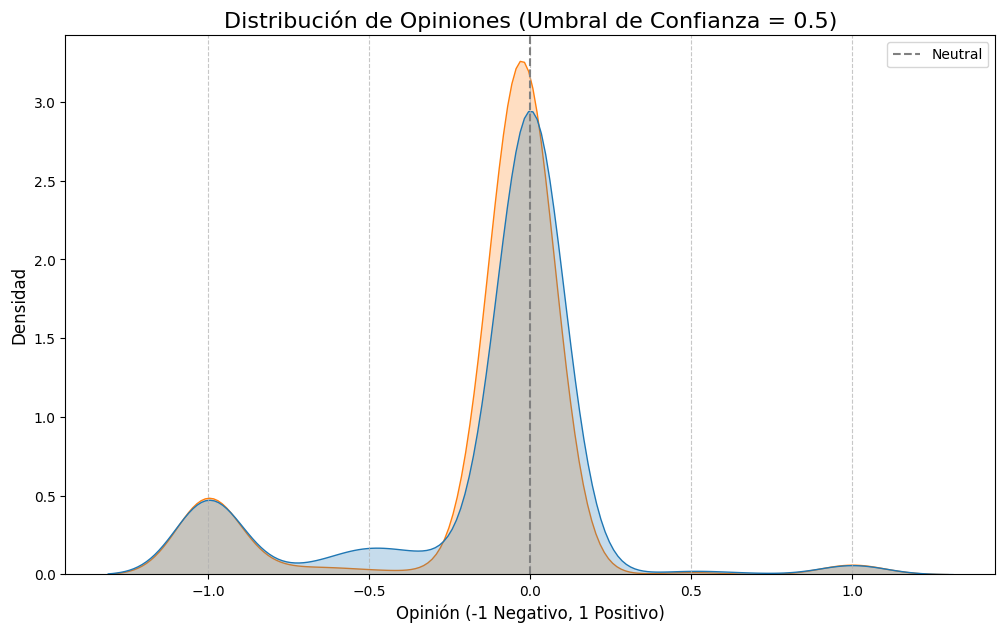

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generando visualización de Antes y Después...")

# Preparar los datos para el gráfico
df_plot = pd.DataFrame({
    'Opinión Inicial': node_data['avg_sentiment'],
    'Opinión Final (Simulación)': node_data['final_opinion']
})

# Re-organizar el DataFrame para que sea compatible con seaborn
df_plot_melted = df_plot.melt(var_name='Estado', value_name='Opinión')

# Crear el gráfico de densidad
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_plot_melted, x='Opinión', hue='Estado', fill=True, common_norm=False)

plt.title(f'Distribución de Opiniones (Umbral de Confianza = {CONFIDENCE_THRESHOLD})', fontsize=16)
plt.xlabel('Opinión (-1 Negativo, 1 Positivo)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.axvline(0, color='grey', linestyle='--', label='Neutral')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Guardar el gráfico
output_filename = RESULTS_DIR / 'simulacion_distribucion_opinion.png'
plt.savefig(output_filename)
print(f"Gráfico de distribución guardado en: {output_filename}")

plt.show()

El gráfico muestra que la red **no llega a un consenso general**, ya que las opiniones finales no se unifican en un solo punto y los grupos más negativos prácticamente no cambian. Se puede ver  cierta convergencia entre usuarios moderados, que se agrupan más cerca del valor neutral, mientras que los extremos están más separados. Entonces el grafico nos indica que hay una polarización moderada, con un leve acercamiento interno pero sin integración entre los grupos más distantes.

### Simulaciones con diferentes parámetros de tolerancia o influencia

Este código compara cómo cambian las opiniones de los usuarios bajo distintos niveles de tolerancia. Para eso define varios valores de umbral de confianza (0.1, 0.3, 0.6 y 0.9) y, manteniendo constantes los demás parámetros, ejecuta la simulación de opinión una vez por cada umbral. En cada caso guarda la opinión final de cada usuario en una nueva columna de un DataFrame, junto con el estado inicial, y al terminar exporta todos estos resultados a un archivo de Excel para poder analizar cómo influye la tolerancia en la formación de consenso o polarización.

In [ ]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1. Definir los Parámetros a Probar

# Vamos a probar 4 niveles de Tolerancia (Umbral de Confianza)
thresholds_to_test = [0.1, 0.3, 0.6, 0.9]

# Mantenemos los otros parámetros iguales
MU = 0.5 # Tasa de convergencia
N_STEPS = G.number_of_nodes() * 100 # Pasos de la simulación

print("Iniciando simulaciones con múltiples parámetros...")

# 2. Bucle de Simulación

# Guardaremos todos los resultados en un DataFrame para compararlos
# Empezamos con el estado inicial
df_simulations = pd.DataFrame({
    'Estado Inicial': node_data['avg_sentiment']
})

for thresh in thresholds_to_test:
    print(f"--- Ejecutando simulación con Tolerancia = {thresh} ---")
    
    # Ejecutamos la simulación (usando siempre las opiniones ORIGINALES)
    final_opinions_dict = simulate_bounded_confidence(
        G, 
        node_data,  # <-- importante: usa los datos iniciales
        thresh, 
        MU, 
        N_STEPS
    )
    
    # Guardamos los resultados en una nueva columna
    col_name = f'Tolerancia = {thresh}'
    df_simulations[col_name] = pd.Series(final_opinions_dict)

print("¡Todas las simulaciones completadas!")

# 3. Guardar los datos
output_file = RESULTS_DIR / 'comparacion_simulaciones.xlsx'
df_simulations.to_excel(output_file)
print(f"Datos de comparación guardados en: {output_file}")

Iniciando simulaciones con múltiples parámetros...
--- Ejecutando simulación con Tolerancia = 0.1 ---
--- Ejecutando simulación con Tolerancia = 0.3 ---
--- Ejecutando simulación con Tolerancia = 0.6 ---
--- Ejecutando simulación con Tolerancia = 0.9 ---
¡Todas las simulaciones completadas!
Datos de comparación guardados en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\comparacion_simulaciones.xlsx


Este código genera una serie de gráficos para comparar cómo se distribuyen las opiniones en el estado inicial y en cada simulación con distinta tolerancia. Primero transforma el DataFrame a formato largo para que seaborn pueda trabajar con él. Luego crea una cuadrícula de gráficos de densidad, donde cada panel corresponde a una simulación distinta (incluyendo el estado inicial) y muestra la forma de la distribución de opiniones en ese escenario. Finalmente se ajustan títulos y etiquetas, guarda la imagen en la carpeta de resultados y muestra los gráficos en pantalla.

Generando visualización comparativa...
Gráfico de comparación guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\comparacion_simulacion_tolerancia.png


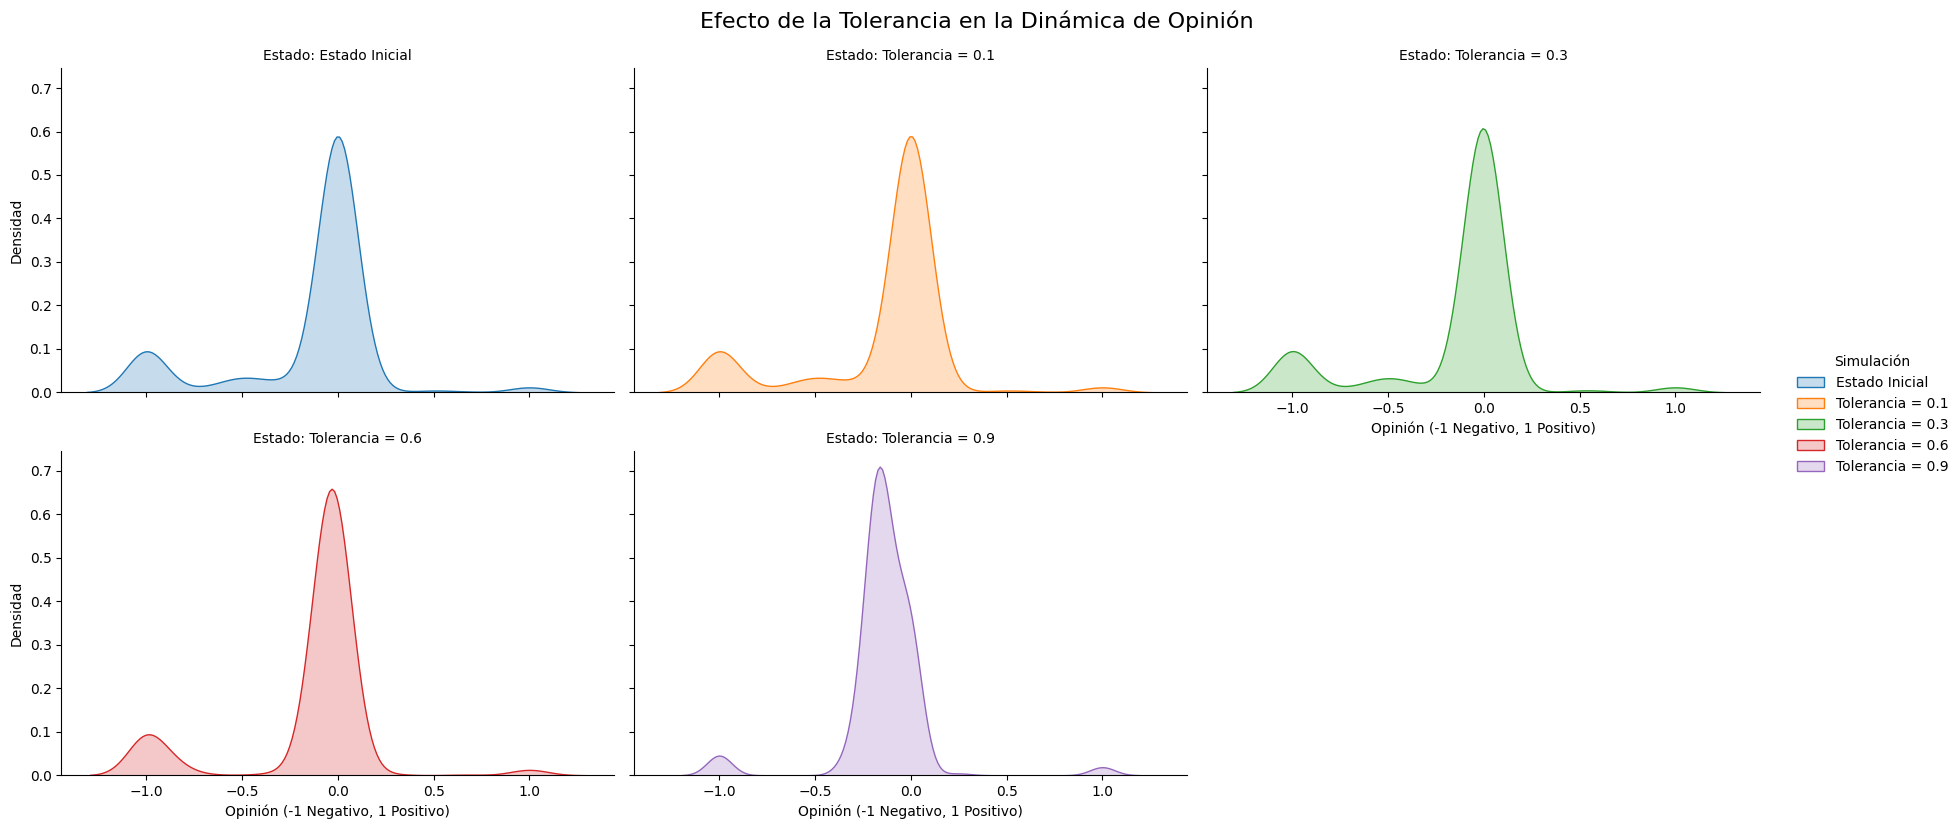

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generando visualización comparativa...")

# 1. Preparar los datos ('derretir' el DataFrame)
# Necesitamos que los datos estén en formato 'largo' para seaborn
df_melted = df_simulations.melt(var_name='Simulación', value_name='Opinión')

# 2. Crear la Cuadrícula de Gráficos (FacetGrid)

g = sns.displot(
    data=df_melted,
    x='Opinión',
    col='Simulación',  # <-- Crea una columna por cada 'Simulación'
    col_wrap=3,        # Máximo 3 gráficos por fila
    kind='kde',        # 'kde' es el gráfico de densidad
    fill=True,
    hue='Simulación',  # Colorea cada gráfico de forma única
    height=4,          # Altura de cada gráfico
    aspect=1.5         # Relación ancho/alto
)

# 3. Ajustar Títulos 
g.fig.suptitle('Efecto de la Tolerancia en la Dinámica de Opinión', y=1.03, fontsize=16)
g.set_axis_labels('Opinión (-1 Negativo, 1 Positivo)', 'Densidad')
g.set_titles("Estado: {col_name}")

# 4. Guardar el gráfico 
output_filename = RESULTS_DIR / 'comparacion_simulacion_tolerancia.png'
plt.savefig(output_filename)
print(f"Gráfico de comparación guardado en: {output_filename}")

plt.show()

### Evaluar cómo evoluciona la distribución de opiniones en el tiempo (polarización,convergencia o fragmentación).


Este código simula cómo van cambiando las opiniones de los usuarios a lo largo del tiempo y guarda "fotos" de ese proceso en distintos momentos. Primero define una función que, partiendo del sentimiento inicial de cada usuario, va haciendo que interactúen con sus vecinos en la red y actualicen sus opiniones cuando no son muy diferentes. En ciertos porcentajes del tiempo total (10, 25, 50 y 100 por ciento) guarda el estado de la opinión de todos los nodos. Al final, devuelve un DataFrame con la evolución de las opiniones para poder analizar cómo se va moviendo la red desde el inicio hasta el final de la simulación.

In [49]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


# 1. Definir la Nueva Función de Simulación (con Snapshots) --

def simulate_and_capture_snapshots(graph, node_data, threshold, mu, total_steps, snapshot_percentages):
    # 1. Configuración inicial
    opinions = node_data["avg_sentiment"].to_dict()
    node_list = list(graph.nodes())
    
    if not node_list:
        print("Error: El grafo no tiene nodos.")
        return pd.DataFrame(columns=["Step", "Node", "Opinion"])
    
    snapshots_data = []  # Guardaremos [Step, Node, Opinion]
    
    # 2. Convertir porcentajes a pasos de tiempo (enteros) y evitar duplicados
    snapshot_steps = [0] + [max(1, int(round(p * total_steps))) for p in snapshot_percentages]
    snapshot_steps = sorted(set(snapshot_steps))
    
    print("Se capturarán snapshots en los pasos:", snapshot_steps)
    
    current_snapshot_index = 0
    
    # 3. Capturar el estado inicial (Paso 0)
    step = snapshot_steps[current_snapshot_index]
    if step == 0:
        for node, opinion in opinions.items():
            snapshots_data.append([step, node, opinion])
        current_snapshot_index += 1
    
    # 4. Bucle de simulación
    for i in range(1, total_steps + 1):
        # Elegir nodo A y vecino B
        node_A = random.choice(node_list)
        neighbors_of_A = list(graph.neighbors(node_A))
        if not neighbors_of_A:
            continue
        
        node_B = random.choice(neighbors_of_A)
        
        opinion_A = opinions[node_A]
        opinion_B = opinions[node_B]
        
        # Regla de confianza
        if abs(opinion_A - opinion_B) < threshold:
            opinions[node_A] = opinion_A + mu * (opinion_B - opinion_A)
            opinions[node_B] = opinion_B + mu * (opinion_A - opinion_B)
        
        # 5. Guardar snapshot si corresponde
        if current_snapshot_index < len(snapshot_steps) and i == snapshot_steps[current_snapshot_index]:
            step = snapshot_steps[current_snapshot_index]
            print(f"Capturando snapshot en el paso {step}...")
            for node, opinion in opinions.items():
                snapshots_data.append([step, node, opinion])
            current_snapshot_index += 1
    
    # 6. Convertir a DataFrame
    df_evolution = pd.DataFrame(snapshots_data, columns=["Step", "Node", "Opinion"])
    return df_evolution


# 2. Ejecutar la simulación 

# PARÁMETROS DEL ESCENARIO
SCENARIO_THRESHOLD = 0.3 # <-- Cambiar al valor que se quiera analizar
MU = 0.5
N_STEPS = G.number_of_nodes() * 100

# SNAPSHOTS A TOMAR (en porcentajes del tiempo total)
SNAPSHOT_POINTS = [0.1, 0.25, 0.5, 1.0] # 10%, 25%, 50% y 100%

print(f"Ejecutando simulación de evolución para Tolerancia = {SCENARIO_THRESHOLD}...")

df_evolution = simulate_and_capture_snapshots(
    G,
    node_data,
    SCENARIO_THRESHOLD,
    MU,
    N_STEPS,
    SNAPSHOT_POINTS
)

print("¡Simulación de evolución completada!")

Ejecutando simulación de evolución para Tolerancia = 0.3...
Se capturarán snapshots en los pasos: [0, 5970, 14925, 29850, 59700]
Capturando snapshot en el paso 5970...
Capturando snapshot en el paso 14925...
Capturando snapshot en el paso 29850...
¡Simulación de evolución completada!


Este código crea una visualización que muestra cómo cambia la distribución de opiniones a lo largo del tiempo durante la simulación.

In [50]:
print(df_evolution["Step"].value_counts())


Step
0        597
5970     597
14925    597
29850    597
Name: count, dtype: int64


Generando visualización de la evolución...
Gráfico de evolución guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\evolucion_opinion_tolerancia_0.3.png


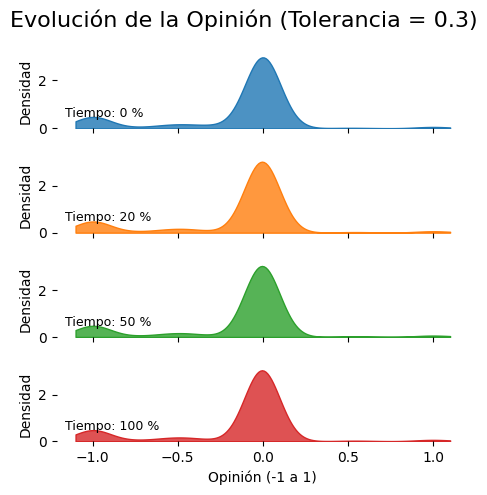

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generando visualización de la evolución...")

# Pasos capturados
steps_captured = sorted(df_evolution["Step"].unique())
max_step = max(steps_captured)

# Crear una etiqueta más clara para cada snapshot (en porcentaje del tiempo)
step_labels = {s: f"{int(round(100 * s / max_step))} %" for s in steps_captured}
df_evolution["StepLabel"] = df_evolution["Step"].map(step_labels)

labels_in_order = [step_labels[s] for s in steps_captured]

# Crear la cuadrícula tipo ridge plot
g = sns.FacetGrid(
    df_evolution,
    row="StepLabel",
    hue="StepLabel",
    aspect=4,        # un poco más angosto
    height=1.2,      # altura de cada franja
    row_order=labels_in_order,
    sharex=True,
    sharey=False
)

# KDE por snapshot
g.map(sns.kdeplot, "Opinion", fill=True, clip=(-1.1, 1.1), alpha=0.8)

# Etiqueta de cada fila
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.02, 0.2, f"Tiempo: {label}",
        color="black",
        ha="left",
        va="center",
        transform=ax.transAxes,
        fontsize=9
    )

g.map(label, "Opinion")

# Limpieza y formato
g.fig.subplots_adjust(hspace=0.4)  # más separación vertical
g.set_titles("")
g.set_axis_labels("Opinión (-1 a 1)", "Densidad")
g.despine(bottom=True, left=True)

# Quitar la leyenda (es redundante con el texto a la izquierda)
if g._legend is not None:
    g._legend.remove()

plt.suptitle(
    f"Evolución de la Opinión (Tolerancia = {SCENARIO_THRESHOLD})",
    y=1.02,
    fontsize=16
)

# Guardar
output_filename = RESULTS_DIR / f"evolucion_opinion_tolerancia_{SCENARIO_THRESHOLD}.png"
plt.savefig(output_filename)
print(f"Gráfico de evolución guardado en: {output_filename}")

plt.show()


Los gráficos muestran que la distribución de opiniones permanece casi igual durante toda la simulación. No se observan señales de polarización, convergencia o fragmentación; la red se mantiene estable y las opiniones no cambian de forma significativa

### Analisis del efecto de eliminar o reforzar conexiones entre comunidades (simulando intervención o censura).

El siguiente código muestra qué pasa con las opiniones cuando se modifican las conexiones entre las comunidades más opuestas. Primero identifica automáticamente la comunidad más negativa y la más positiva según su sentimiento promedio y obtiene los usuarios que pertenecen a cada una. Luego crea dos versiones nuevas de la red: un grafo "censurado", donde se eliminan las conexiones entre esas dos comunidades, y un grafo "puente", donde se agregan nuevas conexiones entre ellas. Sobre esos tres escenarios (original, censurado e intervenido) ejecuta la misma simulación de opinión y finalmente guarda en un archivo las opiniones finales de cada caso para poder comparar cómo cambia la dinámica cuando se cortan puentes o cuando se crean más enlaces entre grupos opuestos.

In [ ]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# 1. Encontrar comunidades opuestas automáticamente
print("Identificando las comunidades más opuestas...")

# Agrupar por comunidad y calcular el sentimiento promedio de cada una
community_sentiments = node_data.groupby('community_id')['avg_sentiment'].mean()

# Encontrar la ID de la comunidad con el sentimiento más bajo (min)
ID_COMUNIDAD_NEGATIVA = community_sentiments.idxmin()
sentimiento_neg = community_sentiments.min()

# Encontrar la ID de la comunidad con el sentimiento más alto (max)
ID_COMUNIDAD_POSITIVA = community_sentiments.idxmax()
sentimiento_pos = community_sentiments.max()

print(f"Comunidad más negativa: ID {ID_COMUNIDAD_NEGATIVA} (Sentimiento promedio: {sentimiento_neg:.2f})")
print(f"Comunidad más positiva: ID {ID_COMUNIDAD_POSITIVA} (Sentimiento promedio: {sentimiento_pos:.2f})")

# 2. Preparar los Nodos de cada Comunidad
# (Este código funciona igual, pero ahora usa las IDs correctas)
nodes_neg = node_data[node_data['community_id'] == ID_COMUNIDAD_NEGATIVA].index
nodes_pos = node_data[node_data['community_id'] == ID_COMUNIDAD_POSITIVA].index

print(f"Comunidad Negativa (ID {ID_COMUNIDAD_NEGATIVA}): {len(nodes_neg)} nodos")
print(f"Comunidad Positiva (ID {ID_COMUNIDAD_POSITIVA}): {len(nodes_pos)} nodos")


# 3. Crear el Grafo "Censurado" (Eliminar Puentes)
G_censored = G.copy()
edges_to_remove = []

print("Buscando puentes para eliminar...")
for u, v in G.edges():
    # Revisar si la arista cruza las comunidades opuestas
    # Usamos .get() para evitar errores si un nodo no está en node_data
    u_comm = node_data.get('community_id', {}).get(u)
    v_comm = node_data.get('community_id', {}).get(v)
    
    if (u_comm == ID_COMUNIDAD_NEGATIVA and v_comm == ID_COMUNIDAD_POSITIVA) or \
       (u_comm == ID_COMUNIDAD_POSITIVA and v_comm == ID_COMUNIDAD_NEGATIVA):
        edges_to_remove.append((u, v))

G_censored.remove_edges_from(edges_to_remove)
print(f"Grafo 'Censurado' creado: Se eliminaron {len(edges_to_remove)} puentes.")


# 4. Crear el Grafo "Puente" (Añadir Conexiones)
G_bridged = G.copy()

# ¿Cuántos puentes nuevos crear? 
# Ej: el 10% del tamaño de la comunidad más pequeña
num_new_edges = int(min(len(nodes_neg), len(nodes_pos)) * 0.1)
new_edges_added = 0

print(f"Creando {num_new_edges} nuevos puentes...")
if len(nodes_neg) > 0 and len(nodes_pos) > 0:
    for _ in range(num_new_edges):
        try:
            # Elegir un nodo al azar de cada grupo
            node_A = random.choice(nodes_neg)
            node_B = random.choice(nodes_pos)
            
            # Añadir la conexión (en ambas direcciones, para reforzar)
            if not G_bridged.has_edge(node_A, node_B):
                G_bridged.add_edge(node_A, node_B)
                G_bridged.add_edge(node_B, node_A) # Reforzar
                new_edges_added += 1
        except Exception as e:
            pass # Evitar errores si las listas están vacías

print(f"Grafo 'Puente' creado: Se añadieron {new_edges_added} puentes.")


# 5. Ejecutar las Simulaciones

# Elegir el escenario de tolerancia que queremos probar
# (usa el que mostró polarización antes, ej: 0.3)
SCENARIO_THRESHOLD = 0.3
MU = 0.5
N_STEPS = G.number_of_nodes() * 100

print(f"\nEjecutando simulaciones (Tolerancia={SCENARIO_THRESHOLD})...")

# Escenario 1: Baseline (Grafo Original)
print("Simulando: Grafo Original...")
opinions_original = simulate_bounded_confidence(G, node_data, SCENARIO_THRESHOLD, MU, N_STEPS)

# Escenario 2: Censura (Sin Puentes)
print("Simulando: Grafo Censurado...")
opinions_censored = simulate_bounded_confidence(G_censored, node_data, SCENARIO_THRESHOLD, MU, N_STEPS)

# Escenario 3: Intervención (Nuevos Puentes)
print("Simulando: Grafo Puente...")
opinions_bridged = simulate_bounded_confidence(G_bridged, node_data, SCENARIO_THRESHOLD, MU, N_STEPS)

print("¡Simulaciones completadas!")


# --- 6. Preparar datos para visualización ---
df_final_comparison = pd.DataFrame({
    'Opinión (Baseline)': pd.Series(opinions_original),
    'Opinión (Censurado)': pd.Series(opinions_censored),
    'Opinión (Intervención)': pd.Series(opinions_bridged)
})

# Guardar los datos
output_file = RESULTS_DIR / 'comparacion_intervencion.xlsx'
df_final_comparison.to_excel(output_file)
print(f"Datos de simulación de intervención guardados en: {output_file}")

Identificando las comunidades más opuestas...
Comunidad más negativa: ID 4 (Sentimiento promedio: -1.00)
Comunidad más positiva: ID 17 (Sentimiento promedio: 0.33)
Comunidad Negativa (ID 4): 1 nodos
Comunidad Positiva (ID 17): 3 nodos
Buscando puentes para eliminar...
Grafo 'Censurado' creado: Se eliminaron 0 puentes.
Creando 0 nuevos puentes...
Grafo 'Puente' creado: Se añadieron 0 puentes.

Ejecutando simulaciones (Tolerancia=0.3)...
Simulando: Grafo Original...
Simulando: Grafo Censurado...
Simulando: Grafo Puente...
¡Simulaciones completadas!
Datos de simulación de intervención guardados en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\comparacion_intervencion.xlsx


Este código genera un gráfico que compara cómo terminan distribuidas las opiniones bajo tres escenarios distintos: la red original, la red censurada (sin conexiones entre comunidades opuestas) y la red intervenida (con nuevas conexiones añadidas entre ellas). Primero reorganiza los datos para que seaborn pueda graficarlos y luego dibuja las curvas de densidad para cada escenario, mostrando si cambian la forma, el centro o la dispersión de las opiniones finales. El objetivo es ver visualmente si cortar conexiones aumenta la separación entre grupos o si reforzarlas ayuda a acercar posiciones. Finalmente, el gráfico se titula, organiza y guarda en la carpeta de resultados.

Generando visualización de escenarios de intervención...
Gráfico de comparación de escenarios guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\comparacion_intervencion_distribucion.png


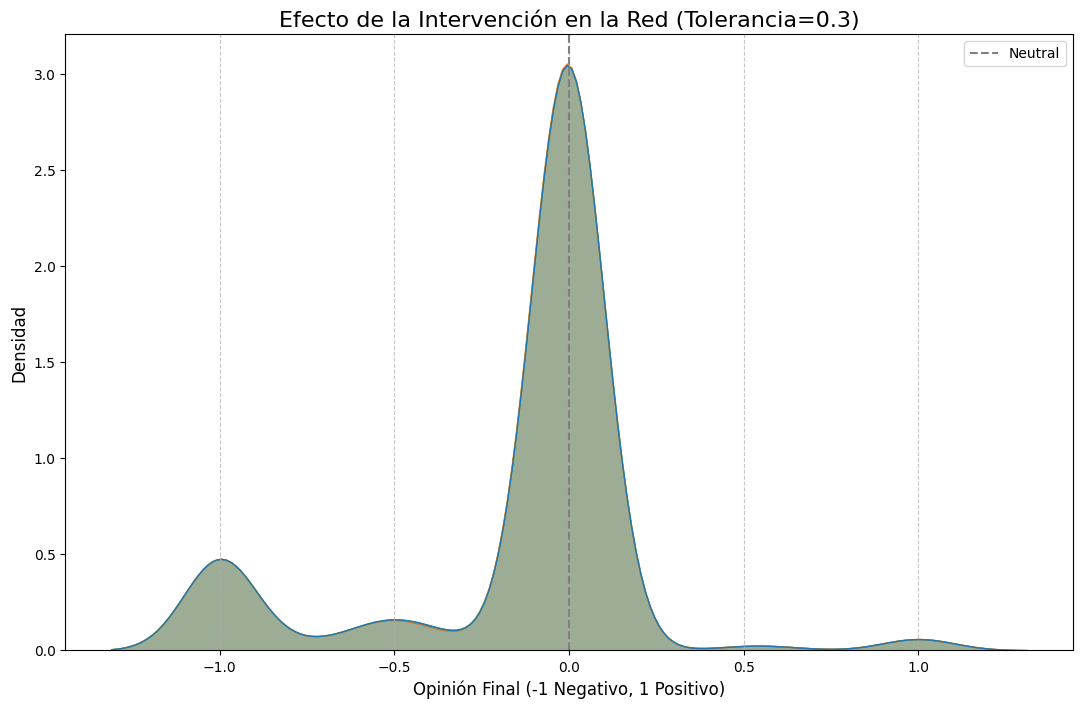

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generando visualización de escenarios de intervención...")

# 'Derretir' el DataFrame para que sea compatible con seaborn
df_plot_melted = df_final_comparison.melt(var_name='Escenario', value_name='Opinión Final')

# Crear el gráfico de densidad
plt.figure(figsize=(13, 8))
sns.kdeplot(
    data=df_plot_melted, 
    x='Opinión Final', 
    hue='Escenario', # Un color para cada escenario
    fill=True,
    common_norm=False, # Importante: normaliza cada curva por separado
    alpha=0.3
)

plt.title(f'Efecto de la Intervención en la Red (Tolerancia={SCENARIO_THRESHOLD})', fontsize=16)
plt.xlabel('Opinión Final (-1 Negativo, 1 Positivo)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.axvline(0, color='grey', linestyle='--', label='Neutral')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Guardar el gráfico
output_filename = RESULTS_DIR / 'comparacion_intervencion_distribucion.png'
plt.savefig(output_filename)
print(f"Gráfico de comparación de escenarios guardado en: {output_filename}")

plt.show()

Este código crea una visualización en formato de cuadrícula para comparar claramente los tres escenarios de intervención: el grafo original, el grafo censurado y el grafo con puentes añadidos. En lugar de mezclar las curvas en un solo gráfico, aquí cada escenario se muestra en su propio panel, permitiendo ver de forma más ordenada cómo queda la distribución final de opiniones en cada caso. El gráfico usa densidades (KDE) rellenas y organiza los resultados en columnas separadas para facilitar la comparación visual. Luego agrega títulos, etiquetas y guarda la figura en la carpeta de resultados.

Generando visualización en CUADRÍCULA...
Gráfico de cuadrícula guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\comparacion_intervencion_CUADRICULA.png


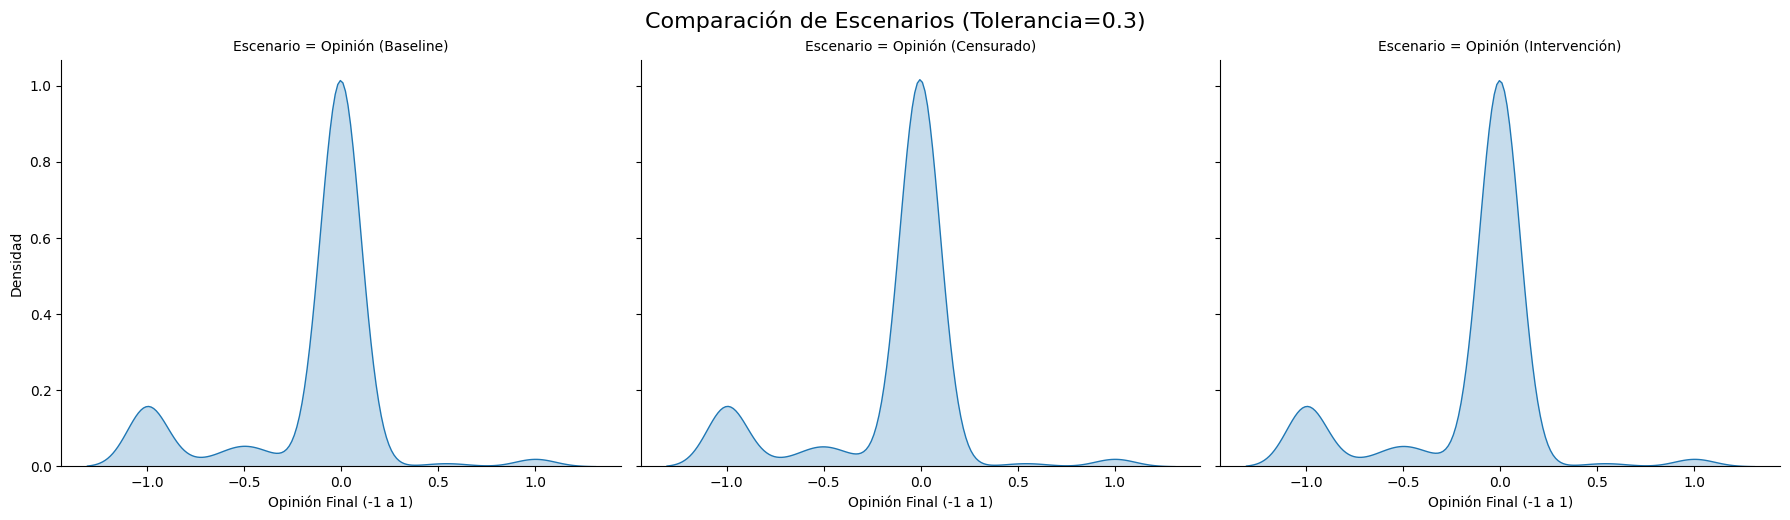

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Generando visualización en CUADRÍCULA...")

g = sns.displot(
    data=df_plot_melted,
    x='Opinión Final',
    col='Escenario',  # <-- Crea una COLUMNA por cada escenario
    kind='kde',
    fill=True,
    height=5,         # Altura de cada gráfico
    aspect=1.2        # Relación de aspecto
)

g.fig.suptitle(f'Comparación de Escenarios (Tolerancia={SCENARIO_THRESHOLD})', y=1.03, fontsize=16)
g.set_axis_labels('Opinión Final (-1 a 1)', 'Densidad')

# Guardar el gráfico
output_filename = RESULTS_DIR / 'comparacion_intervencion_CUADRICULA.png'
plt.savefig(output_filename)
print(f"Gráfico de cuadrícula guardado en: {output_filename}")

plt.show()

Como se puede apreciar en la imagen anterior bajo las condiciones de la simulación (Tolerancia = 0.3), la intervención no tuvo ningún efecto.

- Eliminar puentes (Censura): No importó. Los nodos de las comunidades opuestas ya estaban tan lejos ideológicamente (ej. -0.8 y +0.7) que su diferencia (1.5) era mucho mayor que la tolerancia (0.3). Ya no se estaban "escuchando" de todos modos.

- Añadir puentes (Intervención): Tampoco importó. Conectaste a un nodo A (opinión -0.8) con un nodo B (opinión +0.7). Cuando el modelo intentó que interactuaran, calculó abs(-0.8 - 0.7) = 1.5. Esto es mayor que 0.3, por lo que se ignoraron mutuamente.

Se acaba de demostrar que la polarización en la red está "endurecida". Las cámaras de eco son tan fuertes que un simple cambio estructural (añadir o quitar puentes) no es suficiente para romperlas.

###  preguntas orientadoras

#### ¿Polarización o consenso?

Con las distribuciones inicial vs final, el gráfico de evolución en el tiempo y las comunidades con sentimientos promedio, puedes decir que no hay consenso global, porque la forma de la distribución casi no cambia y siguen existiendo grupos negativos.

#### ¿Qué tipo de nodos o comunidades ejercen mayor influencia en la evolución de las opiniones?

#### ¿Cómo cambia la dinámica si se reduce la conectividad entre comunidades opuestas?

- Con las simulaciones en el grafo original, censurado y con puentes añadidos, y los gráficos de comparación de escenarios, puedes concluir que las curvas finales quedan prácticamente iguales.

- Eso muestra que, con tolerancia 0.3 y la distribución actual, cortar o reforzar puentes entre comunidades opuestas casi no cambia el resultado global, es decir, la dinámica de opinión es bastante estable frente a esas intervenciones.

## Parte 3

### Visualización (Red + Opinión + Evolución)

Este código genera una visualización que compara cómo estaban distribuidas las opiniones en la red antes y después de la simulación. Para ello se dibujan dos grafos lado a lado, manteniendo exactamente la misma posición de cada nodo para que la comparación sea directa. En el primer panel los nodos se colorean según su opinión inicial y en el segundo según su opinión final, usando una escala que va de negativo a positivo. De esta forma se puede observar fácilmente si la red cambia de tono, si las opiniones se mueven hacia un polo específico o si prácticamente se mantienen igual.

Generando visualización de 'Antes' y 'Después'...
Calculando layout de red (esto puede tardar)...
Layout calculado.
Dibujando grafo 'Antes'...
Dibujando grafo 'Después'...
Gráfico de 'Antes y Después' guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\evolucion_red_antes_despues.png


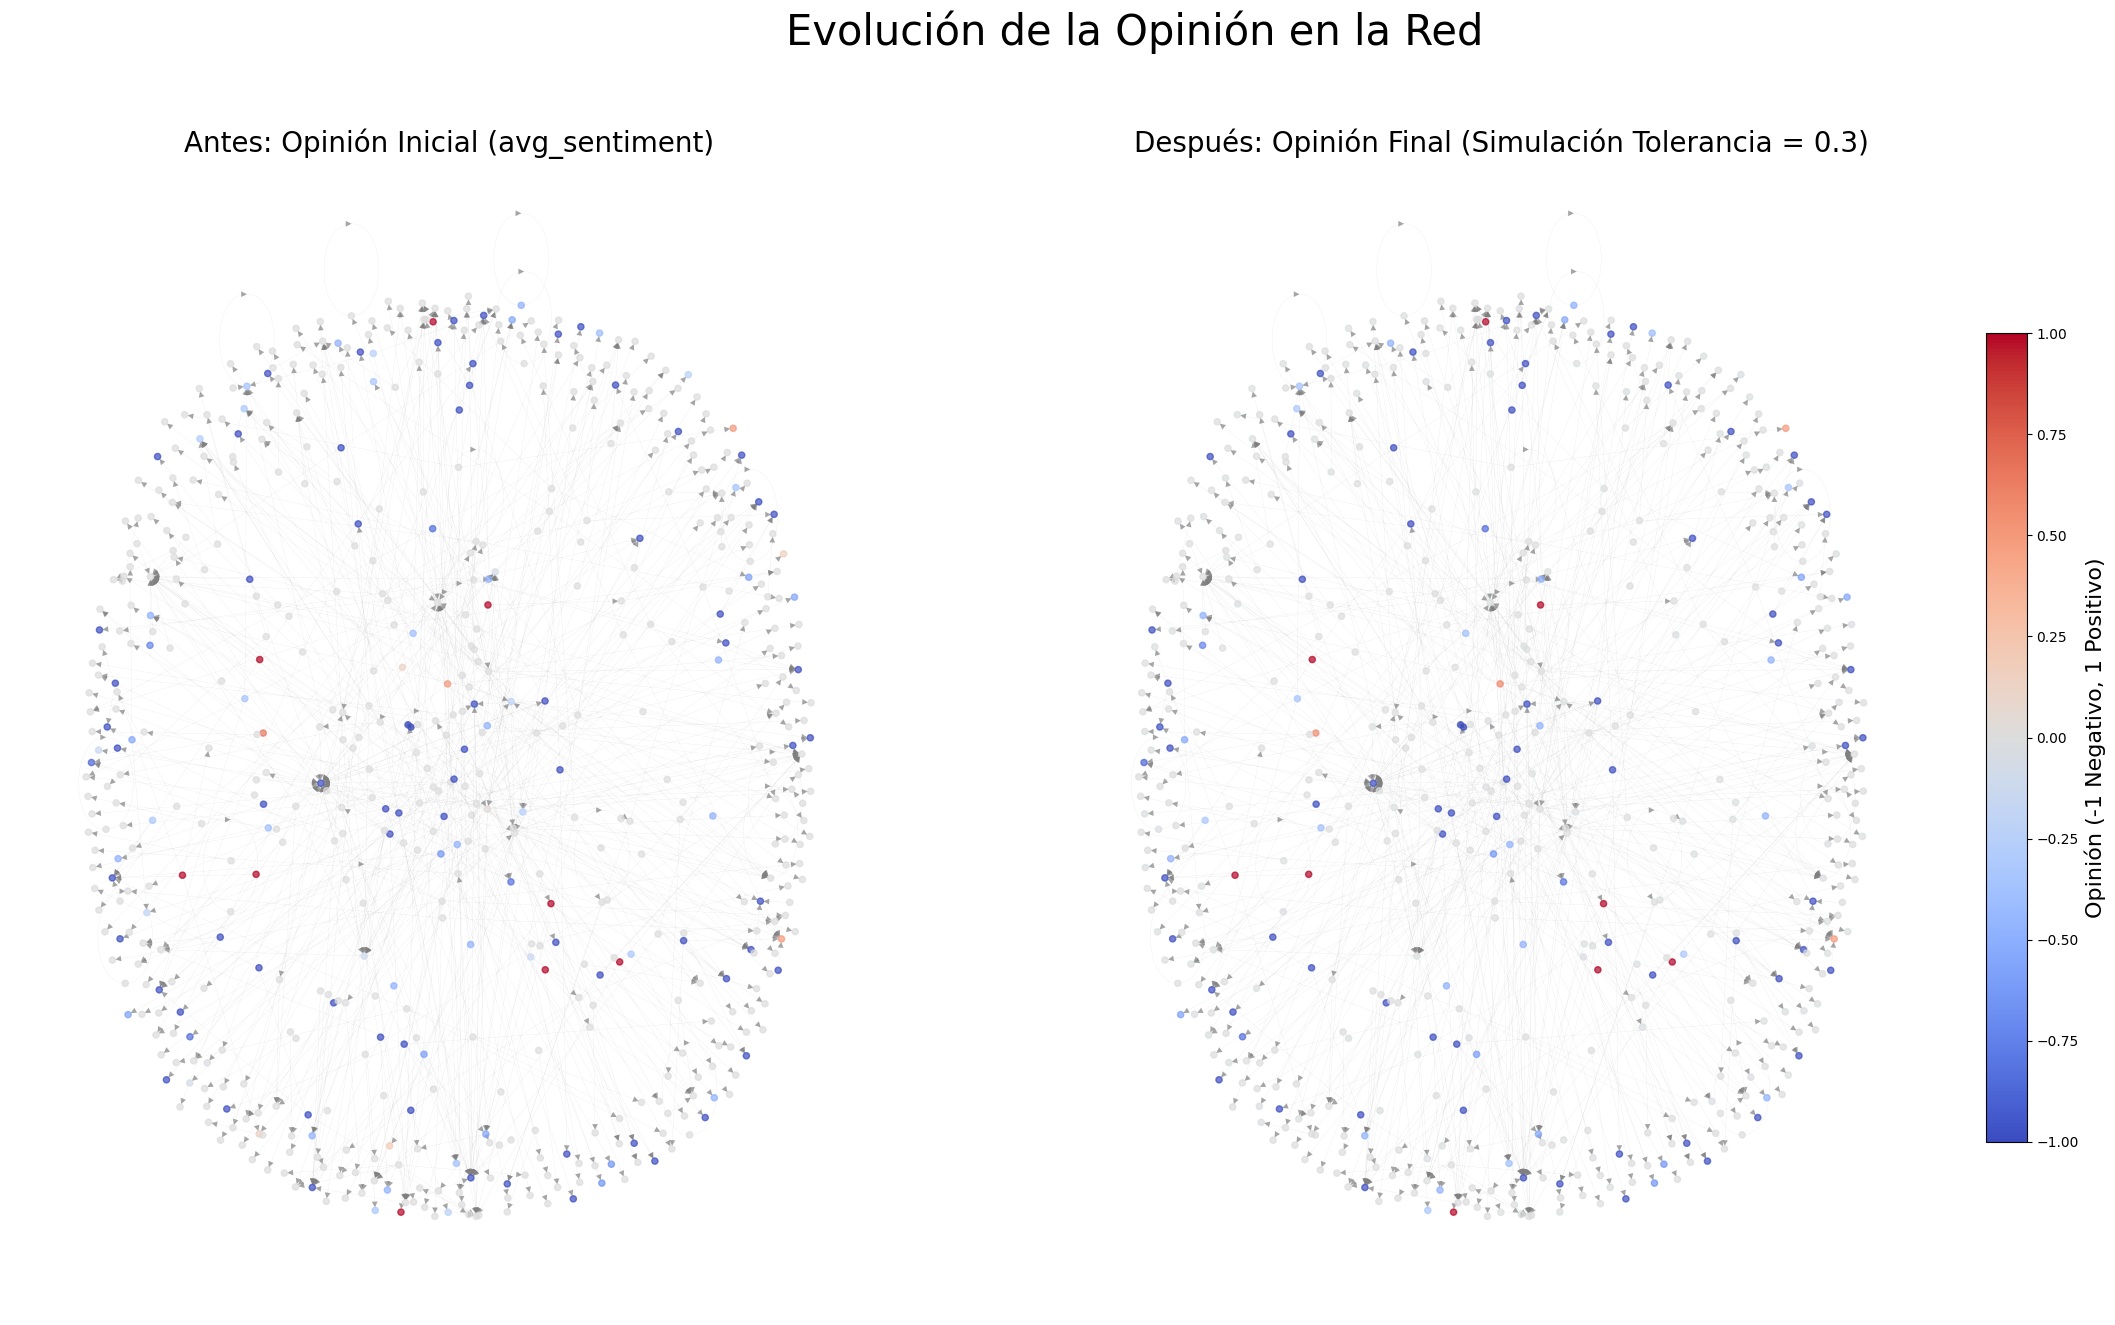

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

print("Generando visualización de 'Antes' y 'Después'...")

# --- 1. Seleccionar el escenario de opinión final ---
# Usaremos el resultado de la simulación que mostró polarización
try:
    opinion_final_col = 'Tolerancia = 0.3'
    opiniones_finales = df_simulations[opinion_final_col]
except KeyError:
    opinion_final_col = 'Tolerancia = 0.3'
    print(f"Error: No se encontró la columna '{opinion_final_col}'. Usando la primera simulación disponible.")
    # Fallback por si el nombre es diferente
    opinion_final_col = df_simulations.columns[1] # [0] es 'Estado Inicial'
    opiniones_finales = df_simulations[opinion_final_col]

# 2. Calcular el Layout
# Esto es crucial. Calculamos la posición de los nodos y la guardamos. Así, ambos gráficos tendrán la misma estructura.
print("Calculando layout de red (esto puede tardar)...")
pos = nx.spring_layout(G, k=0.15, iterations=50)
print("Layout calculado.")

# --- 3. Preparar los Colores ---
# Usaremos un mapa de color divergente (ej. Rojo-Blanco-Azul)
# donde -1 es Rojo, 0 es Blanco/Gris, +1 es Azul.
vcenter = 0.0 # El punto neutral
vmin = -1.0
vmax = 1.0
cmap = 'coolwarm' # Rojo -> Azul

# 4. Generar la Visualización (en una figura con 2 subplots)
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

# GRÁFICO 1: ANTES (Opinión Inicial)
ax1 = axes[0]
print("Dibujando grafo 'Antes'...")
nx.draw_networkx(
    G,
    pos=pos,
    ax=ax1,
    node_color=node_data['avg_sentiment'], # Color por opinión INICIAL
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    node_size=20,
    with_labels=False,
    width=0.05,
    edge_color='grey',
    alpha=0.7
)
ax1.set_title(f'Antes: Opinión Inicial (avg_sentiment)', fontsize=20)
ax1.axis('off')

# GRÁFICO 2: DESPUÉS (Opinión Final)
ax2 = axes[1]
print("Dibujando grafo 'Después'...")
nx.draw_networkx(
    G,
    pos=pos,
    ax=ax2,
    node_color=opiniones_finales, # Color por opinión FINAL
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    node_size=20,
    with_labels=False,
    width=0.05,
    edge_color='grey',
    alpha=0.7
)
ax2.set_title(f'Después: Opinión Final (Simulación {opinion_final_col})', fontsize=20)
ax2.axis('off')

# 5. Añadir Barra de Color
# Añadimos una barra de color para referencia
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Opinión (-1 Negativo, 1 Positivo)', fontsize=16)

# 6. Guardar y Mostrar
fig.suptitle('Evolución de la Opinión en la Red', fontsize=30)
output_filename = RESULTS_DIR / 'evolucion_red_antes_despues.png'
plt.savefig(output_filename, dpi=150, bbox_inches='tight')
print(f"Gráfico de 'Antes y Después' guardado en: {output_filename}")

plt.show()

### Mapa de Comunidades (Top 5)

Generando Mapa de Comunidades (Filtrado)...
Grafo original: 597 nodos.
Grafo filtrado (Top 5): 213 nodos.
Calculando layout para el grafo filtrado...


c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:605: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  source_node_size = self.node_size[self.nodelist.index(source)]
c:\Users\alvar\AppData\Local\Programs\Python\Python312\Lib\site-packages\networkx\drawing\nx_pylab.py:606: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_node_size = self.node_size[self.nodelist.index(target)]


Mapa de comunidades filtrado guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\mapa_comunidades_filtrado.png


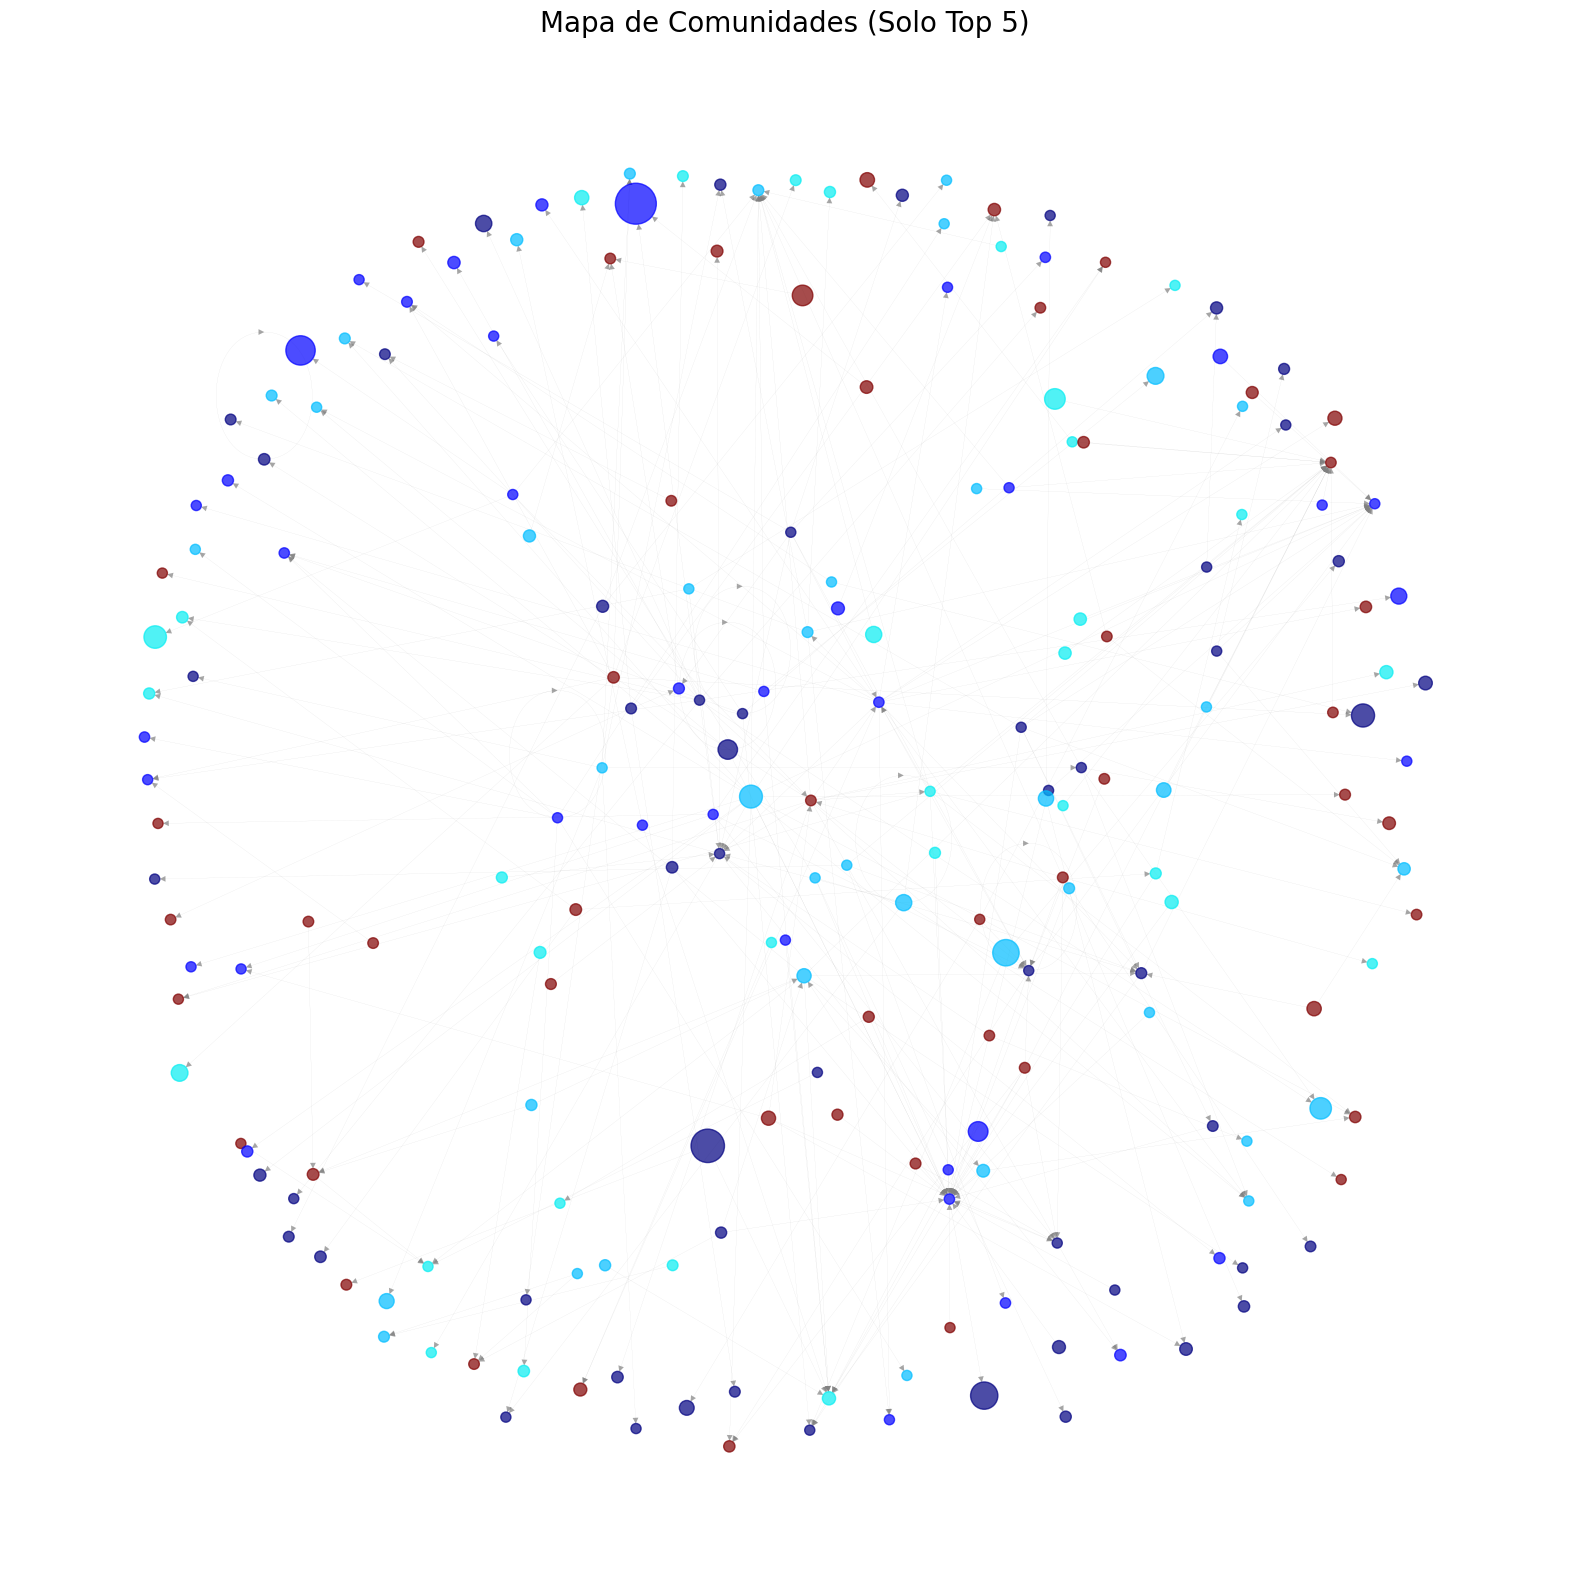

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

print("Generando Mapa de Comunidades (Filtrado)...")

# 1. Identificar las Top 5 comunidades
community_sizes = node_data['community_id'].value_counts()
top_n_communities = community_sizes.head(5).index # <-- ¡Solo las 5 más grandes!

# 2. Obtener los nodos de esas comunidades
nodes_to_keep = node_data[node_data['community_id'].isin(top_n_communities)].index

# 3. Crear un "Sub-Grafo" solo con esos nodos
G_filtered = G.subgraph(nodes_to_keep)

print(f"Grafo original: {G.number_of_nodes()} nodos.")
print(f"Grafo filtrado (Top 5): {G_filtered.number_of_nodes()} nodos.")

# 4. Preparar datos para el dibujo (solo de nodos filtrados)
node_colors_comm = node_data.loc[nodes_to_keep]['community_id']
node_sizes_pr = node_data.loc[nodes_to_keep]['pagerank'] * 50000

# 5. Calcular Layout (¡solo del grafo filtrado!)
print("Calculando layout para el grafo filtrado...")
pos_filtered = nx.spring_layout(G_filtered, k=0.3, iterations=50) 
# k=0.3 le da más espacio

# 6. Dibujar el Gráfico
plt.figure(figsize=(20, 20))
nx.draw_networkx(
    G_filtered,
    pos=pos_filtered,
    node_color=node_colors_comm, # Color por COMUNIDAD
    node_size=node_sizes_pr,    # Tamaño por PageRank
    with_labels=False,
    width=0.05,
    alpha=0.7,
    edge_color='grey',
    cmap=plt.cm.jet        # Paleta de colores (arcoíris)
)
plt.title('Mapa de Comunidades (Solo Top 5)', fontsize=20)
plt.axis('off')

# Guardar el gráfico
output_filename = RESULTS_DIR / 'mapa_comunidades_filtrado.png'
plt.savefig(output_filename, dpi=150)
print(f"Mapa de comunidades filtrado guardado en: {output_filename}")
plt.show()

### Gráfico evolución "Antes/Después" filtrado

Generando Evolución 'Antes/Después' (Filtrado)...
Gráfico 'Antes y Después' filtrado guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\evolucion_red_antes_despues_FILTRADO.png


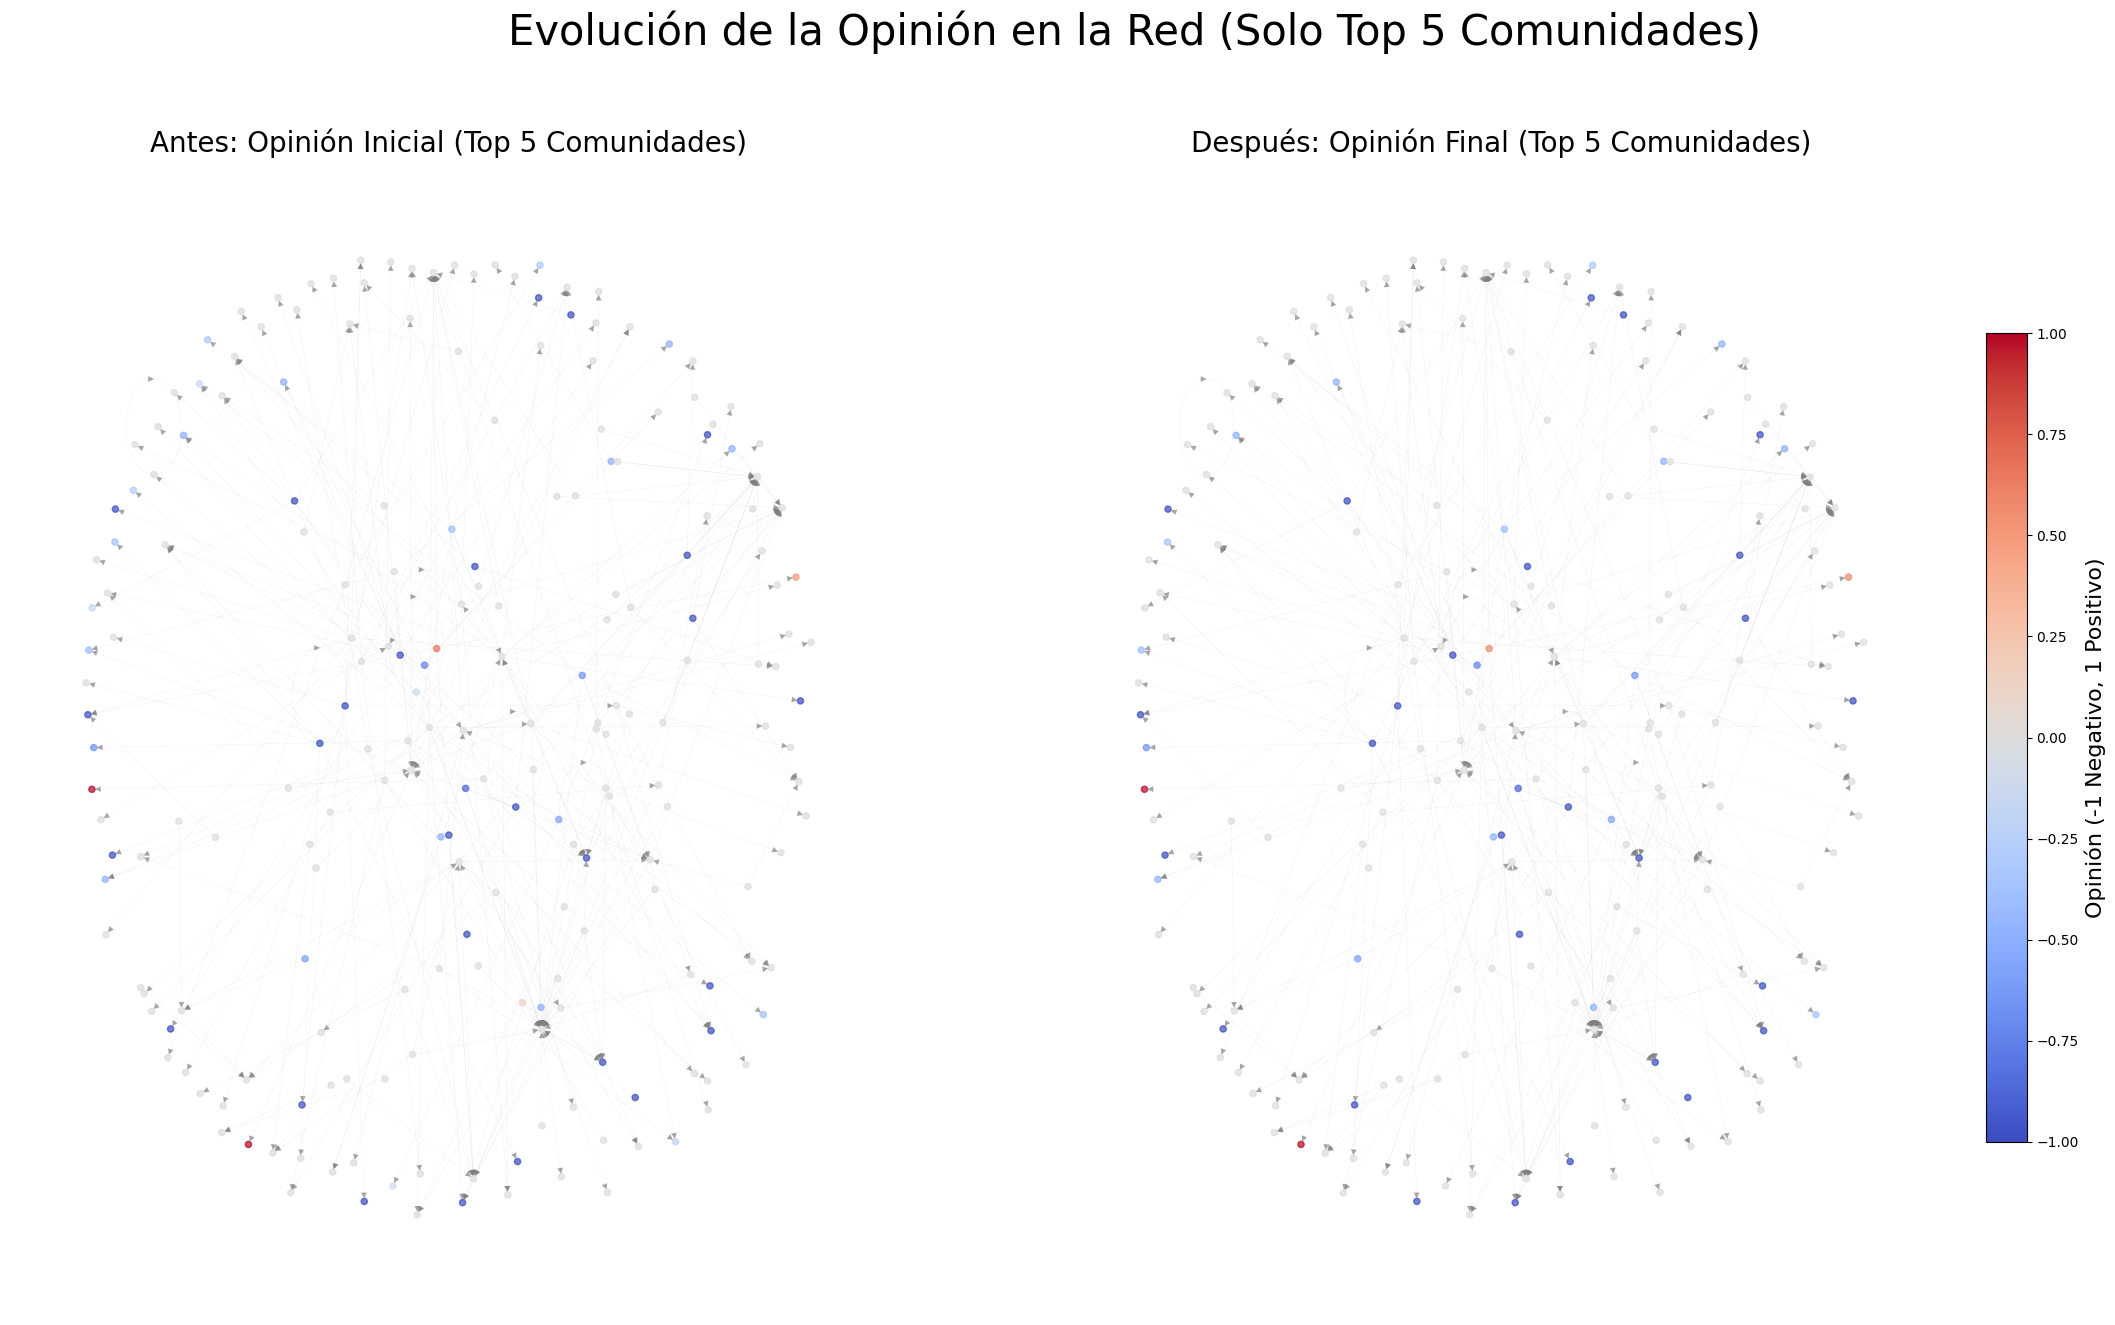

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


print("Generando Evolución 'Antes/Después' (Filtrado)...")

# 1. Seleccionar el escenario de opinión final

try:
    opinion_final_col = 'Tolerancia = 0.3'
    opiniones_finales = df_simulations[opinion_final_col]
except KeyError:
    print(f"Error: No se encontró la columna '{opinion_final_col}'.")
    # Salir o usar un fallback
    opiniones_finales = df_simulations[df_simulations.columns[1]]


# 2. Filtrar los datos de opinión
opiniones_iniciales_filtradas = node_data.loc[nodes_to_keep]['avg_sentiment']
opiniones_finales_filtradas = opiniones_finales.loc[nodes_to_keep]

# 3. Preparar los Colores (Rojo-Azul)
vcenter = 0.0
vmin = -1.0
vmax = 1.0
cmap = 'coolwarm' # Rojo -> Azul

# 4. Generar la Visualización (en 2 subplots)
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

# GRÁFICO 1: ANTES (Opinión Inicial)
ax1 = axes[0]
nx.draw_networkx(
    G_filtered,
    pos=pos_filtered, # <-- Layout filtrado
    ax=ax1,
    node_color=opiniones_iniciales_filtradas, # <-- Datos filtrados
    cmap=cmap, vmin=vmin, vmax=vmax,
    node_size=20, with_labels=False, width=0.05,
    edge_color='grey', alpha=0.7
)
ax1.set_title(f'Antes: Opinión Inicial (Top 5 Comunidades)', fontsize=20)
ax1.axis('off')

# GRÁFICO 2: DESPUÉS (Opinión Final)
ax2 = axes[1]
nx.draw_networkx(
    G_filtered,
    pos=pos_filtered, # <-- Layout filtrado
    ax=ax2,
    node_color=opiniones_finales_filtradas, # <-- Datos filtrados
    cmap=cmap, vmin=vmin, vmax=vmax,
    node_size=20, with_labels=False, width=0.05,
    edge_color='grey', alpha=0.7
)
ax2.set_title(f'Después: Opinión Final (Top 5 Comunidades)', fontsize=20)
ax2.axis('off')

# 5. Añadir Barra de Color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Opinión (-1 Negativo, 1 Positivo)', fontsize=16)

# 6. Guardar y Mostrar
fig.suptitle('Evolución de la Opinión en la Red (Solo Top 5 Comunidades)', fontsize=30)
output_filename = RESULTS_DIR / 'evolucion_red_antes_despues_FILTRADO.png'
plt.savefig(output_filename, dpi=150, bbox_inches='tight')
print(f"Gráfico 'Antes y Después' filtrado guardado en: {output_filename}")

plt.show()

### Mapas de polarización

Generando el Mapa de Polarización Ideológica...
Mapa de polarización guardado en: c:\Users\alvar\Desktop\Universidad 6to año 2do semestre\Seminario de telematica\Problema2_seminario\results\mapa_de_polarizacion_final.png


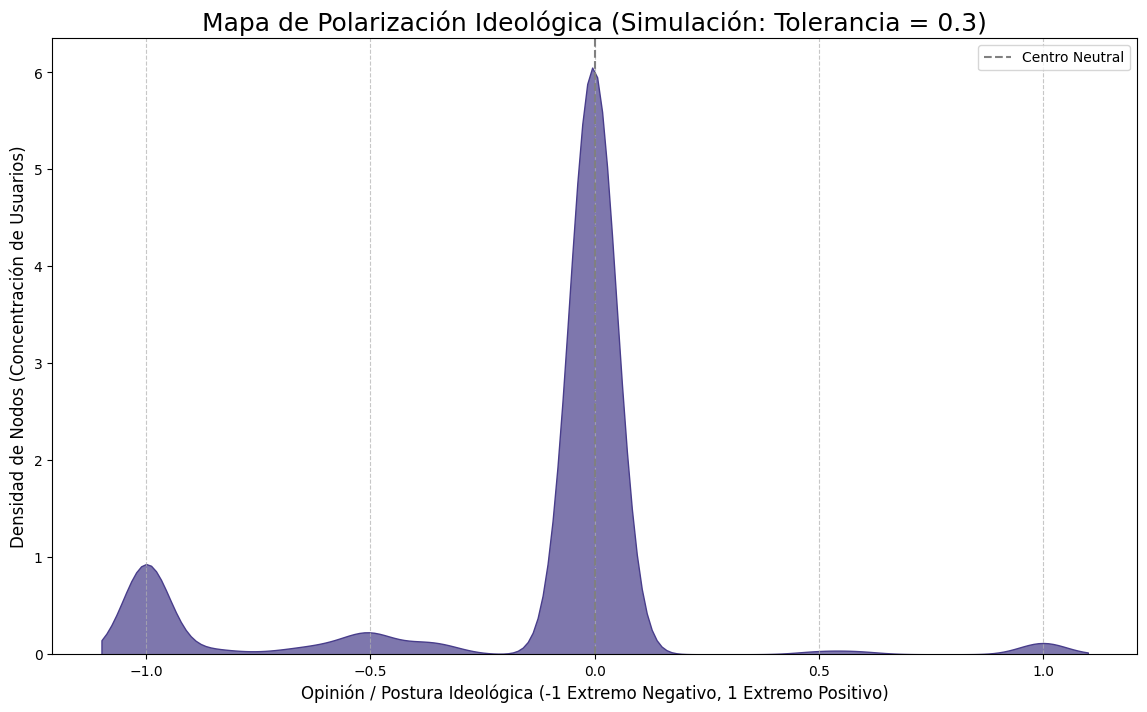

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


print("Generando el Mapa de Polarización Ideológica...")

# 1. Selecciona el Escenario a Mapear
# Elige la columna que mejor represente la polarización en tu red
try:
    POLARIZED_SCENARIO = 'Tolerancia = 0.3'
    opiniones_finales = df_simulations[POLARIZED_SCENARIO]
except KeyError:
    POLARIZED_SCENARIO = 'Tolerancia = 0.3'
    print(f"Error: No se encontró la columna '{POLARIZED_SCENARIO}'. Usando la primera simulación disponible.")
    # Fallback por si el nombre es diferente
    POLARIZED_SCENARIO = df_simulations.columns[1] # [0] es 'Estado Inicial'
    opiniones_finales = df_simulations[POLARIZED_SCENARIO]

# 2. Dibujar el Mapa (KDE Plot) ---
plt.figure(figsize=(14, 8))

sns.kdeplot(
    opiniones_finales,
    fill=True,
    clip=(-1.1, 1.1), # No dibujar fuera del rango -1 a 1
    bw_adjust=0.5,    # Ajusta la "suavidad" (un valor más bajo = picos más definidos)
    color='darkslateblue',
    alpha=0.7
)

# 3. Mejorar la Legibilidad
plt.title(f'Mapa de Polarización Ideológica (Simulación: {POLARIZED_SCENARIO})', fontsize=18)
plt.xlabel('Opinión / Postura Ideológica (-1 Extremo Negativo, 1 Extremo Positivo)', fontsize=12)
plt.ylabel('Densidad de Nodos (Concentración de Usuarios)', fontsize=12)
plt.axvline(0, color='grey', linestyle='--', label='Centro Neutral')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()

# 4. Guardar el Gráfico
output_filename = RESULTS_DIR / 'mapa_de_polarizacion_final.png'
plt.savefig(output_filename, dpi=150)
print(f"Mapa de polarización guardado en: {output_filename}")

plt.show()

# Discusión

*Preguntas orientadoras*

Parte 1
- ¿Qué tan polarizada está la conversación?
- ¿Existen comunidades que actúan como puentes entre grupos ideológicos opuestos?
- ¿Qué rol tienen los nodos más influyentes en la propagación de posturas extremas o conciliadoras?


Parte 2
- ¿Tiende la red a la polarización o al consenso?
- ¿Qué tipo de nodos o comunidades ejercen mayor influencia en la evolución de las opiniones?
- ¿Cómo cambia la dinámica si se reduce la conectividad entre comunidades opuestas?


Parte 3
- ¿Qué patrones visuales reflejan la polarización o el consenso?
- ¿Qué implicancias tienen los hallazgos para el diseño de sistemas más resilientes a la desinformación o la radicalización?


- --

**Aquí va la discusión**